## Part A: Subreddit Prediction ##

In [0]:
subreddit_train = "coursework_subreddit_train.json"
subreddit_test = "coursework_subreddit_test.json"

!gsutil cp gs://textasdata/coursework/coursework_subreddit_train.json $subreddit_train 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_test.json  $subreddit_test

Copying gs://textasdata/coursework/coursework_subreddit_train.json...
- [1 files][ 10.1 MiB/ 10.1 MiB]                                                
Operation completed over 1 objects/10.1 MiB.                                     
Copying gs://textasdata/coursework/coursework_subreddit_test.json...
/ [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      
Copying gs://textasdata/coursework/coursework_subreddit_train.json...
/ [1 files][ 10.1 MiB/ 10.1 MiB]                                                
Operation completed over 1 objects/10.1 MiB.                                     
Copying gs://textasdata/coursework/coursework_subreddit_test.json...
/ [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      


In [0]:
import pandas as pd

train_threads = pd.read_json(path_or_buf=subreddit_train, lines=True)
print(list(train_threads.columns.values))
print(train_threads.head())
print(train_threads.size)

['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post                                              posts  \
0           1.0  [{'body': 'I think everyone has that one frien...   
1           1.0  [{'body': 'I not 100% sure this is the right p...   
2           1.0  [{'body': '', 'author': 'Leisure321', 'url': '...   
3           1.0  [{'body': 'It's called 'forgetting things'.', ...   
4           1.0  [{'body': 'How would I do this? I am looking t...   

        subreddit                                              title  \
0   relationships  How do I [23F] communicate with my self-center...   
1  summonerschool  What Cherry switch do you recommend for League...   
2       askreddit                   Where do memes go when they die?   
3           trees                     Some weird long term affects??   
4        buildapc  Simple question: If I install Windows to a sta...   

                                                 url  
0  https://www.reddit.com/r/relation

In [0]:
test_threads = pd.read_json(path_or_buf=subreddit_test, lines=True)
print(test_threads.head())
print(test_threads.size)

   is_self_post                                              posts  \
0           1.0  [{'body': 'Was watching a VOD from last years ...   
1           1.0  [{'body': 'Basically what the title says.', 'u...   
2           1.0  [{'body': '', 'author': 'Daft-Punk', 'url': 'h...   
3           1.0  [{'body': 'I start running this year. I do it ...   
4           1.0  [{'body': '[deleted]', 'url': 'https://www.red...   

       subreddit                                              title  \
0      starcraft  Just a reminder on how much SC2 has evolved th...   
1    whowouldwin  Your Favorite Hero Now Has A Healing Factor As...   
2      askreddit  If you could live anywhere in the world, where...   
3      askreddit                   Do you ever get use to exercise?   
4  tipofmytongue         [TOMT] [book] A scary french book for kids   

                                                 url  
0  https://www.reddit.com/r/starcraft/comments/mq...  
1  https://www.reddit.com/r/whowouldwin/co

In [0]:
subreddit_counts = train_threads['subreddit'].value_counts()
print(subreddit_counts.describe())
top_subbreddits = subreddit_counts.nlargest(20)
top_subbreddits_list = top_subbreddits.index.tolist()
print(top_subbreddits)

count     20.000000
mean      72.800000
std       73.368285
min       28.000000
25%       36.250000
50%       45.500000
75%       63.750000
max      334.000000
Name: subreddit, dtype: float64
askreddit               334
leagueoflegends         196
buildapc                131
explainlikeimfive        82
trees                    66
techsupport              63
pcmasterrace             62
gaming                   62
electronic_cigarette     59
relationships            48
tipofmytongue            43
hearthstone              38
jailbreak                38
atheism                  37
summonerschool           37
reddit.com               34
movies                   33
whowouldwin              33
personalfinance          32
starcraft                28
Name: subreddit, dtype: int64


In [0]:
train_labels = train_threads['subreddit']
test_labels = test_threads['subreddit']

In [0]:
train_labels[:10]

0      relationships
1     summonerschool
2          askreddit
3              trees
4           buildapc
5        whowouldwin
6     summonerschool
7              trees
8    personalfinance
9    leagueoflegends
Name: subreddit, dtype: object

In [0]:
train_threads.posts[train_threads.subreddit=='atheism']

37      [{'body': 'My seven year old nephew. Whom I am...
71      [{'body': 'I remember being a kid and the cath...
203     [{'body': 'I just wanted to share something I'...
229     [{'body': 'I was taught in my Catholic high sc...
242     [{'body': 'The proof that they publish is incr...
246     [{'body': 'I've been digging up some ateistici...
289     [{'body': '    <meta name="Generator" content=...
293     [{'body': '', 'author': 'triscabor', 'url': 'h...
306     [{'body': 'We've gone from a community of like...
366     [{'body': 'http://www.youtube.com/watch?v=Kppx...
374     [{'body': '"I'm not a political guy in the sen...
391     [{'body': 'Maybe its just cause i am in the so...
423     [{'body': 'It's good that you think so, had a ...
476     [{'body': ' Im not talking about shutting down...
502     [{'body': '"People who don't believe, can't se...
512     [{'body': '', 'author': 'xavier687', 'url': 'h...
518     [{'body': 'Basically you just try to guess if ...
525     [{'bod

In [0]:
train_threads.posts.loc[0]

[{'annotations': [{'annotator': '343090f214e68ce7f8a0c4111d6022ec',
    'link_to_post': 't3_2x19a2',
    'main_type': 'answer'},
   {'annotator': 'd0bf500c45ae7c1c08eb65ef0a4e48f9',
    'link_to_post': 't3_2x19a2',
    'main_type': 'answer'},
   {'annotator': 'e9e4b3ab355135fa954badcc06bfccc6',
    'link_to_post': 't3_2x19a2',
    'main_type': 'answer'}],
  'author': 'Pouritdownmythroat',
  'body': 'I think everyone has that one friend who loves to hear themselves talk. If it\'s worth it to you to keep Hannah is your life, try a different approach.\n\nIf you need to talk about something important that requires her full attention, make some serious eye contact and say something to the effect of "Hannah, I truly value your opinion and need your help. I need to speak with you about something near dear to me. Can I have your full attention and advise about this?" She will hopefully understand the gravity of what you are asking. \n\nIf not, it may be time to part way amicably before things 

# One Hot Encoder

Lab 5 code

In [0]:
import spacy

# Load the medium english model. 
# We will use this model to get embedding features for tokens later.
!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_md', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')

    100% |████████████████████████████████| 120.9MB 106.3MB/s 
  Running setup.py install for en-core-web-md ... done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#@Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#@Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
  return normalized_tokens

#@Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

encoder

Features

In [0]:
#Title, body, id
#['is_self_post', 'posts', 'subreddit', 'title', 'url']
posts_feature = train_threads['posts']
train_feature_body = []
i=0
for p in posts_feature:
  body_=""
  for l in p:
    if 'body' in l:
      body_ = body_+l['body']
    
  train_feature_body.append(body_)

len(train_feature_body)
train_threads['selected_body'] = train_feature_body

In [0]:

posts_feature = train_threads['posts']
train_feature_author = []
i=0
for p in posts_feature:
  body_=""
  print(p)
  i=i+1
  for l in p:
    if 'author' in l:
      body_ = body_+l['author']
    
  train_feature_author.append(body_)

len(train_feature_author)
train_threads['selectedauthor'] = train_feature_author


[{'body': 'I think everyone has that one friend who loves to hear themselves talk. If it\'s worth it to you to keep Hannah is your life, try a different approach.\n\nIf you need to talk about something important that requires her full attention, make some serious eye contact and say something to the effect of "Hannah, I truly value your opinion and need your help. I need to speak with you about something near dear to me. Can I have your full attention and advise about this?" She will hopefully understand the gravity of what you are asking. \n\nIf not, it may be time to part way amicably before things get nasty.\n\nGood luck!', 'post_depth': 1, 'author': 'Pouritdownmythroat', 'majority_link': 't3_2x19a2', 'annotations': [{'main_type': 'answer', 'link_to_post': 't3_2x19a2', 'annotator': '343090f214e68ce7f8a0c4111d6022ec'}, {'main_type': 'answer', 'link_to_post': 't3_2x19a2', 'annotator': 'd0bf500c45ae7c1c08eb65ef0a4e48f9'}, {'main_type': 'answer', 'link_to_post': 't3_2x19a2', 'annotator'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
train_feature_title = train_threads['title']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# Pass in the tokenizer as the tokenizer to the vectorizer.
# Create a one-hot encoding vectorizer.
one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize)
one_hot_vectorizer_author = CountVectorizer()


One Hot encoding on features

In [0]:
print(len(train_feature_body))
print(len(train_feature_title))
print(len(train_feature_author))
print(len(train_labels))

1456
1456
1456
1456


**Test features**

In [0]:
posts_feature = test_threads['posts']
test_feature_body = []
for p in posts_feature:
  body_=""
  for l in p:
    if 'body' in l:
      body_ = body_+l['body']
    
  test_feature_body.append(body_)

len(test_feature_body)
test_threads['selected_body'] = test_feature_body

In [0]:
posts_feature = test_threads['posts']
test_feature_author = []
for p in posts_feature:
  body_=""
  for l in p:
    if 'author' in l:
      body_ = body_+l['author']
    
  test_feature_author.append(body_)

len(test_feature_author)

test_threads['selectedauthor'] = test_feature_author

In [0]:
test_feature_title = test_threads['title']

In [0]:
print(len(test_feature_body))
print(len(test_feature_title))
print(len(test_feature_author))

365
365
365


In [0]:
train_one_hot_body = one_hot_vectorizer.fit_transform(train_feature_body)
test_one_hot_body = one_hot_vectorizer.transform(test_feature_body)

train_one_hot_title = one_hot_vectorizer.fit_transform(train_feature_title)
test_one_hot_title = one_hot_vectorizer.transform(test_feature_title)

train_one_hot_author = one_hot_vectorizer_author.fit_transform(train_feature_author)
test_one_hot_author = one_hot_vectorizer_author.transform(test_feature_author)

# This creates input features for our classification on all subsets of our collection.




Concatenate the features

In [0]:
from scipy import sparse
X_train = sparse.hstack([train_one_hot_body,train_one_hot_title, train_one_hot_author])
X_test = sparse.hstack([test_one_hot_body, test_one_hot_title, test_one_hot_author ])


In [0]:
print("Train_shape "+str(X_train.shape))
print("Test_shape "+str(X_test.shape))

Train_shape (1456, 29304)
Test_shape (365, 29304)


**Classifiers** : Logistic Regresion, SVC, Random Forest

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
res = clf.predict(X_test)


In [0]:
res

array(['tipofmytongue', 'whowouldwin', 'askreddit', 'askreddit',
       'tipofmytongue', 'trees', 'askreddit', 'askreddit',
       'explainlikeimfive', 'leagueoflegends', 'buildapc', 'askreddit',
       'askreddit', 'trees', 'electronic_cigarette', 'personalfinance',
       'leagueoflegends', 'askreddit', 'techsupport', 'leagueoflegends',
       'leagueoflegends', 'askreddit', 'buildapc', 'askreddit',
       'relationships', 'askreddit', 'askreddit', 'explainlikeimfive',
       'leagueoflegends', 'techsupport', 'askreddit', 'askreddit',
       'buildapc', 'askreddit', 'gaming', 'buildapc', 'buildapc',
       'leagueoflegends', 'leagueoflegends', 'pcmasterrace', 'askreddit',
       'buildapc', 'buildapc', 'explainlikeimfive', 'techsupport',
       'leagueoflegends', 'leagueoflegends', 'personalfinance',
       'buildapc', 'askreddit', 'askreddit', 'buildapc',
       'leagueoflegends', 'tipofmytongue', 'askreddit', 'askreddit',
       'explainlikeimfive', 'jailbreak', 'askreddit', 'askre

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average = 'macro')
  recall = recall_score(predictions, true_labels, average = 'macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels,1,average='macro') #1 means f_1 measure
  labels = unique_labels(test_labels, res)
  f1_ = fbeta_score(predictions, true_labels,1,average=None)
  y_pos = np.arange(len(labels))
  plt.figure(figsize=(12,12))
  performance = f1_
  plt.bar(y_pos, performance, align='center', alpha=0.5, color= ['b','g','r','c','m', 'y', 'k','olive','slategray','navy','plum', 'coral', 'salmon', 'wheat','aqua','orchid','tomato','teal','midnightblue','thistle'])

  plt.xticks(y_pos, labels,rotation=90)
  plt.ylabel('F1-Macro')
  plt.xlabel='subredits'
  plt.title('F1-Macro for each class')
  plt.show()
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels))
  
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


Evaluation for: Logistic Regression


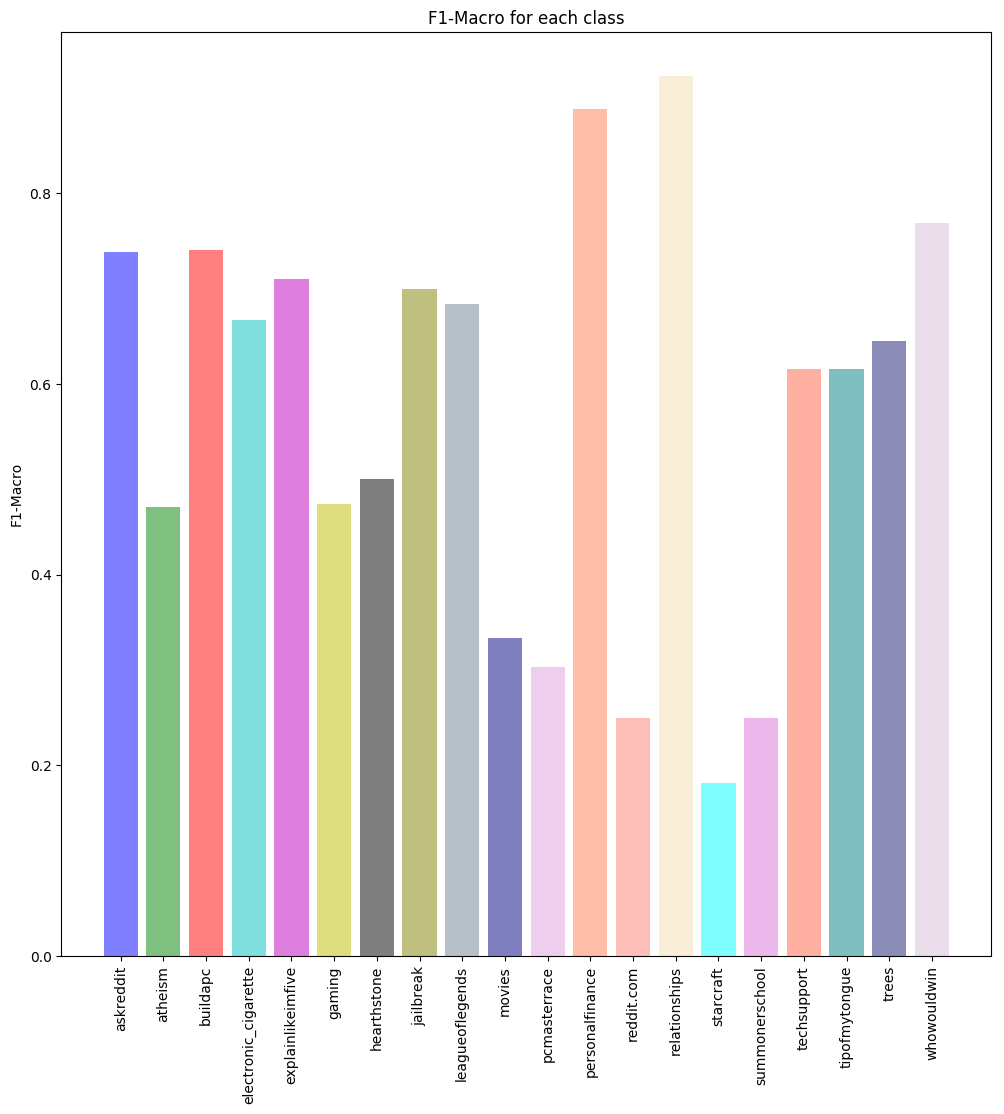

Classifier 'Logistic Regression' has Acc=0.652 P=0.550 R=0.729 F1=0.573
                      precision    recall  f1-score   support

           askreddit       0.86      0.65      0.74       111
             atheism       0.33      0.80      0.47         5
            buildapc       0.81      0.68      0.74        44
electronic_cigarette       0.78      0.58      0.67        12
   explainlikeimfive       0.79      0.65      0.71        17
              gaming       0.53      0.43      0.47        21
         hearthstone       0.33      1.00      0.50         5
           jailbreak       0.64      0.78      0.70         9
     leagueoflegends       0.81      0.59      0.68        66
              movies       0.20      1.00      0.33         1
        pcmasterrace       0.22      0.50      0.30        10
     personalfinance       0.80      1.00      0.89         8
          reddit.com       0.17      0.50      0.25         2
       relationships       1.00      0.86      0.92        

In [0]:
evaluation_summary('Logistic Regression', res, test_labels)

###Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#code from CM documentation from sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontweight='bold', fontsize=20)

Confusion matrix, without normalization


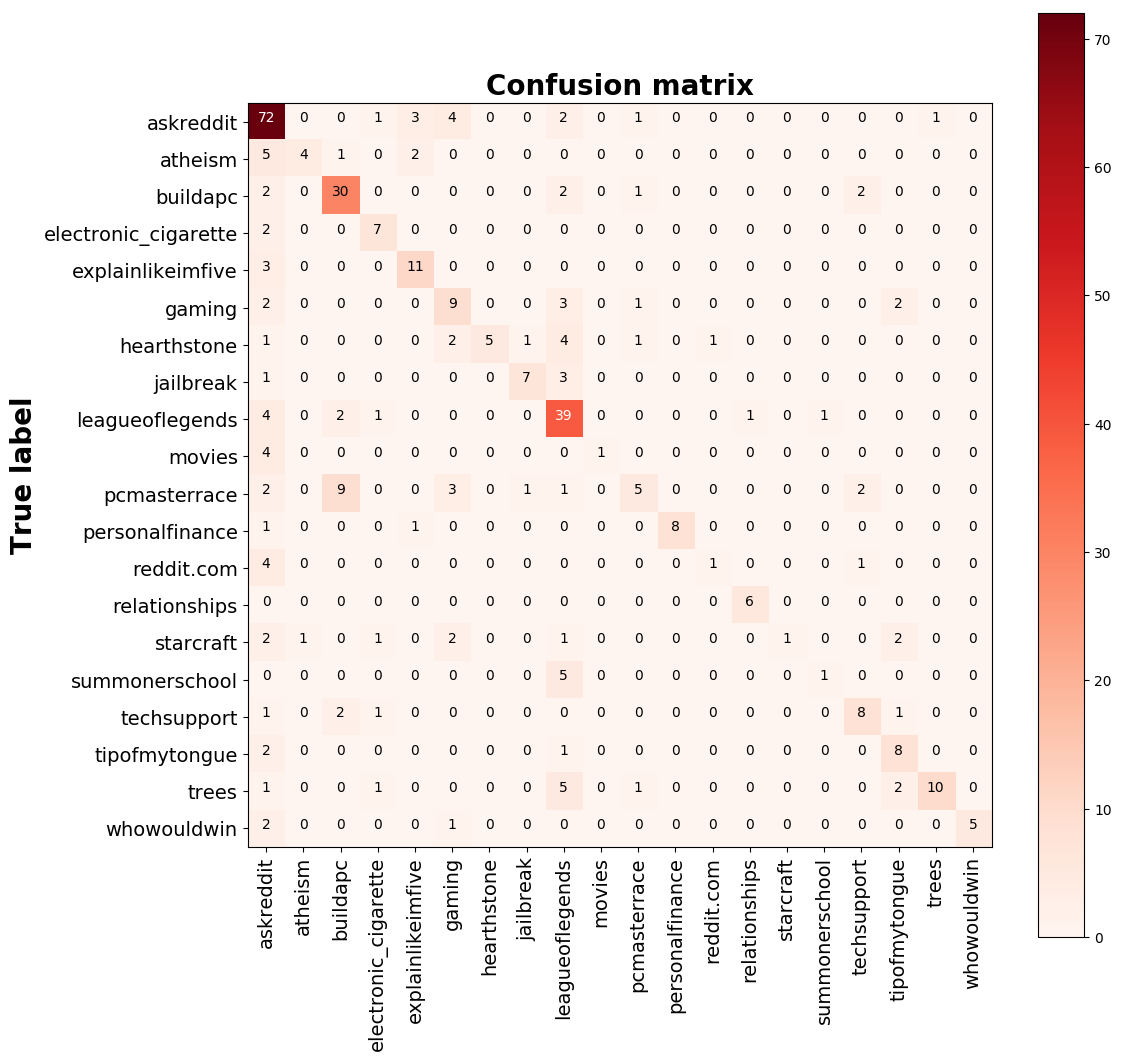

In [0]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(test_labels, res)
plot_confusion_matrix(confusion_matrix(test_labels,res),labels)

## SVM

In [0]:
from sklearn.svm import SVC
clf_sv = SVC(gamma='auto', kernel = 'rbf')
clf_sv.fit(X_train, train_labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
res_svm = clf_sv.predict(X_test)

Evaluation for: SVM


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


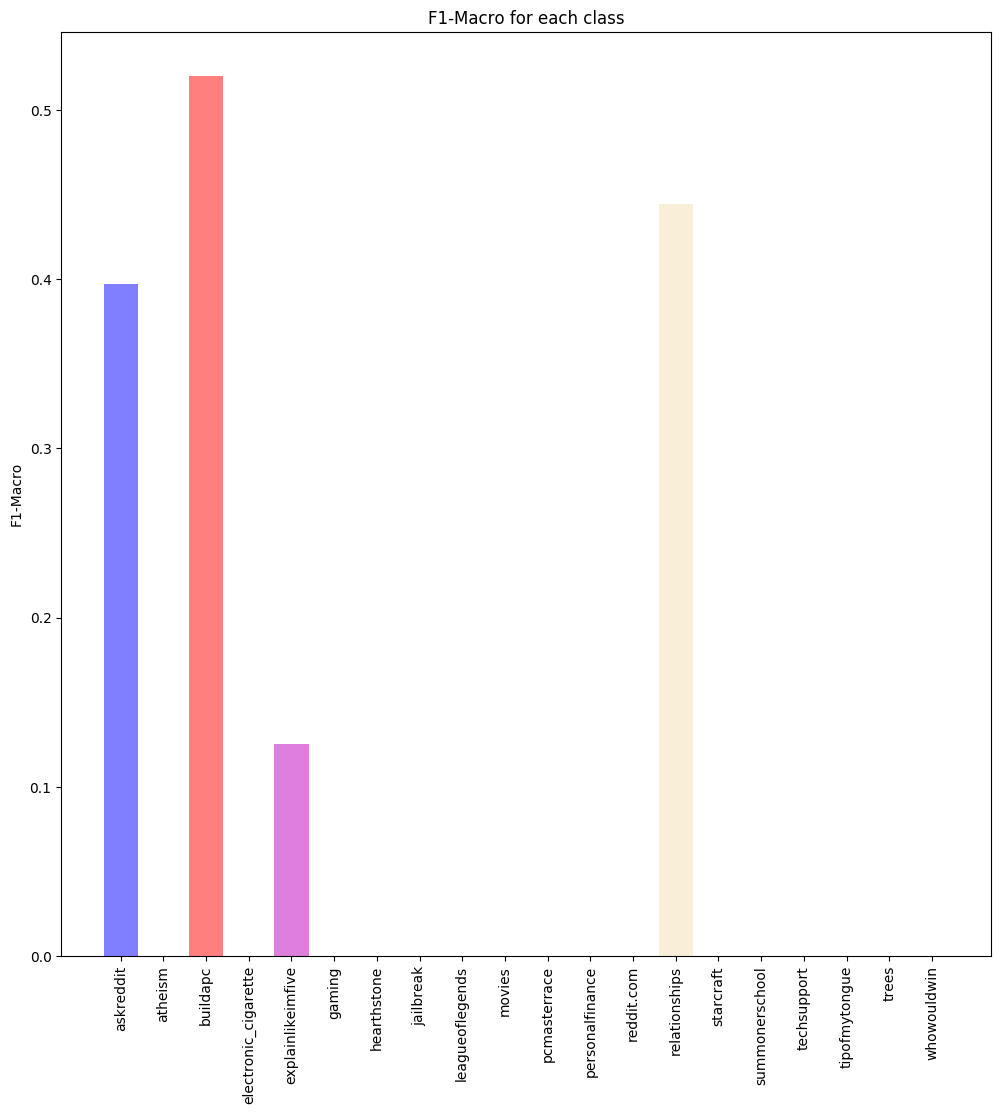

Classifier 'SVM' has Acc=0.274 P=0.088 R=0.121 F1=0.074
                      precision    recall  f1-score   support

           askreddit       1.00      0.25      0.40       339
             atheism       0.00      0.00      0.00         0
            buildapc       0.35      1.00      0.52        13
electronic_cigarette       0.00      0.00      0.00         0
   explainlikeimfive       0.07      0.50      0.12         2
              gaming       0.00      0.00      0.00         0
         hearthstone       0.00      0.00      0.00         0
           jailbreak       0.00      0.00      0.00         0
     leagueoflegends       0.00      0.00      0.00         6
              movies       0.00      0.00      0.00         0
        pcmasterrace       0.00      0.00      0.00         0
     personalfinance       0.00      0.00      0.00         0
          reddit.com       0.00      0.00      0.00         0
       relationships       0.33      0.67      0.44         3
           st

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
evaluation_summary('SVM', res_svm, test_labels)

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf_rf= RandomForestClassifier(n_estimators=50, max_depth=5,random_state=0)
clf_rf.fit(X_train, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
res_rf = clf_rf.predict(X_test)

Evaluation for: RF


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


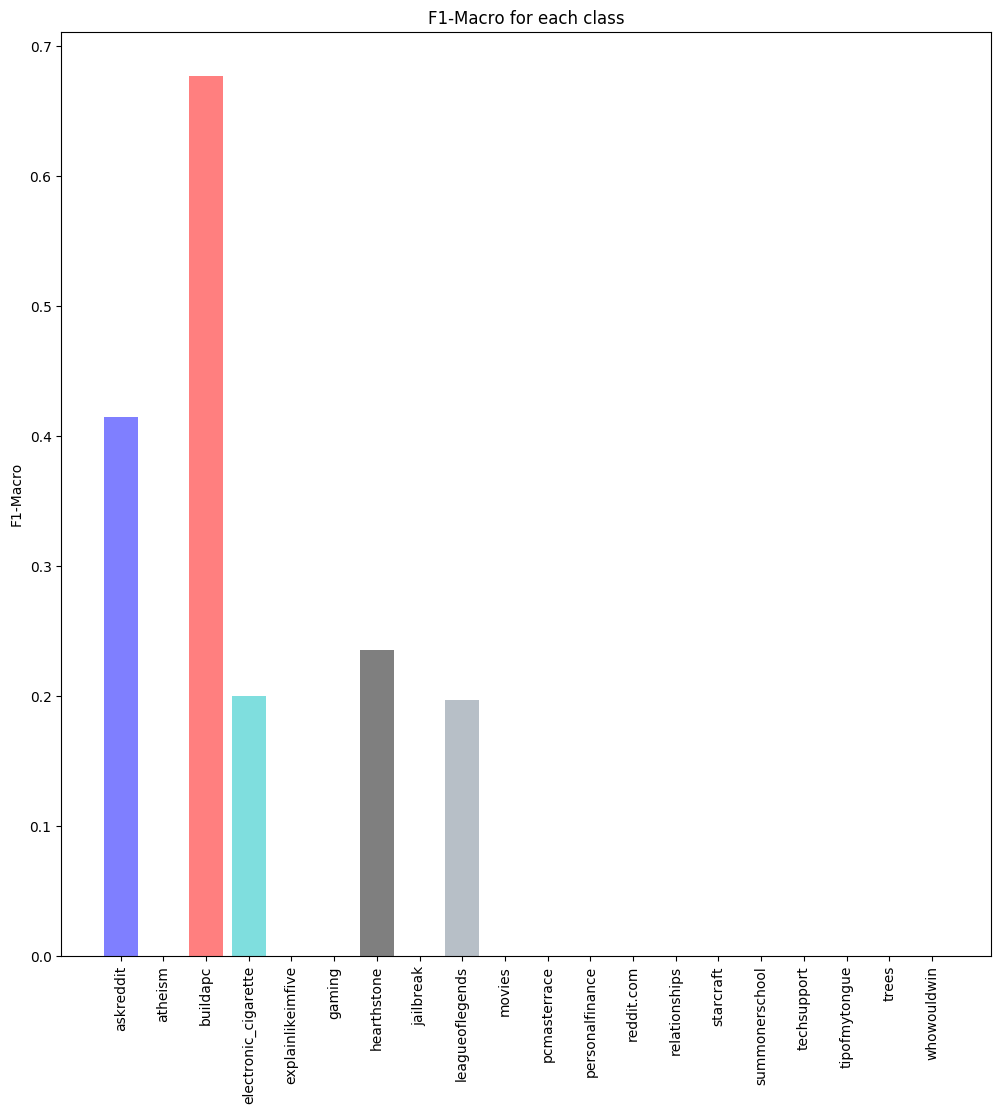

Classifier 'RF' has Acc=0.315 P=0.098 R=0.175 F1=0.086
                      precision    recall  f1-score   support

           askreddit       1.00      0.26      0.41       321
             atheism       0.00      0.00      0.00         0
            buildapc       0.59      0.79      0.68        28
electronic_cigarette       0.11      1.00      0.20         1
   explainlikeimfive       0.00      0.00      0.00         0
              gaming       0.00      0.00      0.00         0
         hearthstone       0.13      1.00      0.24         2
           jailbreak       0.00      0.00      0.00         0
     leagueoflegends       0.12      0.46      0.20        13
              movies       0.00      0.00      0.00         0
        pcmasterrace       0.00      0.00      0.00         0
     personalfinance       0.00      0.00      0.00         0
          reddit.com       0.00      0.00      0.00         0
       relationships       0.00      0.00      0.00         0
           sta

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
evaluation_summary('RF', res_rf, test_labels)

In [0]:
#got the all the threads of LoL that didnt retrieved/predict from my classifier
res = test_threads.posts[(test_threads.subreddit=='leagueoflegends')*(res_rf != 'leagueoflegends')]
for l in res:
  for p in l:
    if 'body' in p:
      print(p['body'])

I'm not leveling up my smurf for the intention of stomping on lower elo. (Currently Plat 3). I want to do it so I can get bronze 5 and dodge every promo to get it to plat MMR.

I'm wondering if it's possible for a Riot member to directly just put me on Bronze V? so I don't ruin everyone's placement games
you'll likely get your account(s) perma-banned for this.
that's why I'm asking.


nope, you have to  lose your placement matches. but whats the point in ruining it for others just to get placed in bronze 5 ? 
I'm not going to ruin it for others and I just want bronze V so when people lol nexus they'll be wtf bronze 

Doesnt dodging a placement count as a lose? Im just guessing.
Is anyone else suffering this issue? I played a game today and wanted to check the advanced stats. It said it couldn't be found. Ok, I'll give it some time to update. I grab a snack, play an ARAM. After, I check my match history. Still hasn't updated. Anyone else got this?

EDIT: This is on the North American se

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


## Dummy

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average = 'macro')
  recall = recall_score(predictions, true_labels, average = 'macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels,1,average='macro') #1 means f_1 measure
  labels = unique_labels(test_labels, predictions)
  f1_ = fbeta_score(predictions, true_labels,1,average=None)
  y_pos = np.arange(len(labels))
  plt.figure(figsize=(12,12))
  performance = f1_
  plt.bar(y_pos, performance, align='center', alpha=0.5, color= ['b','g','r','c','m', 'y', 'k','olive','slategray','navy','plum', 'coral', 'salmon', 'wheat','aqua','orchid','tomato','teal','midnightblue','thistle'])

  plt.xticks(y_pos, labels,rotation=90)
  plt.ylabel('F1-Macro')
  plt.xlabel='subredits'
  plt.title('F1-Macro for each class')
  plt.show()
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels))
  
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


0.10410958904109589
Evaluation for: Dummy Prior


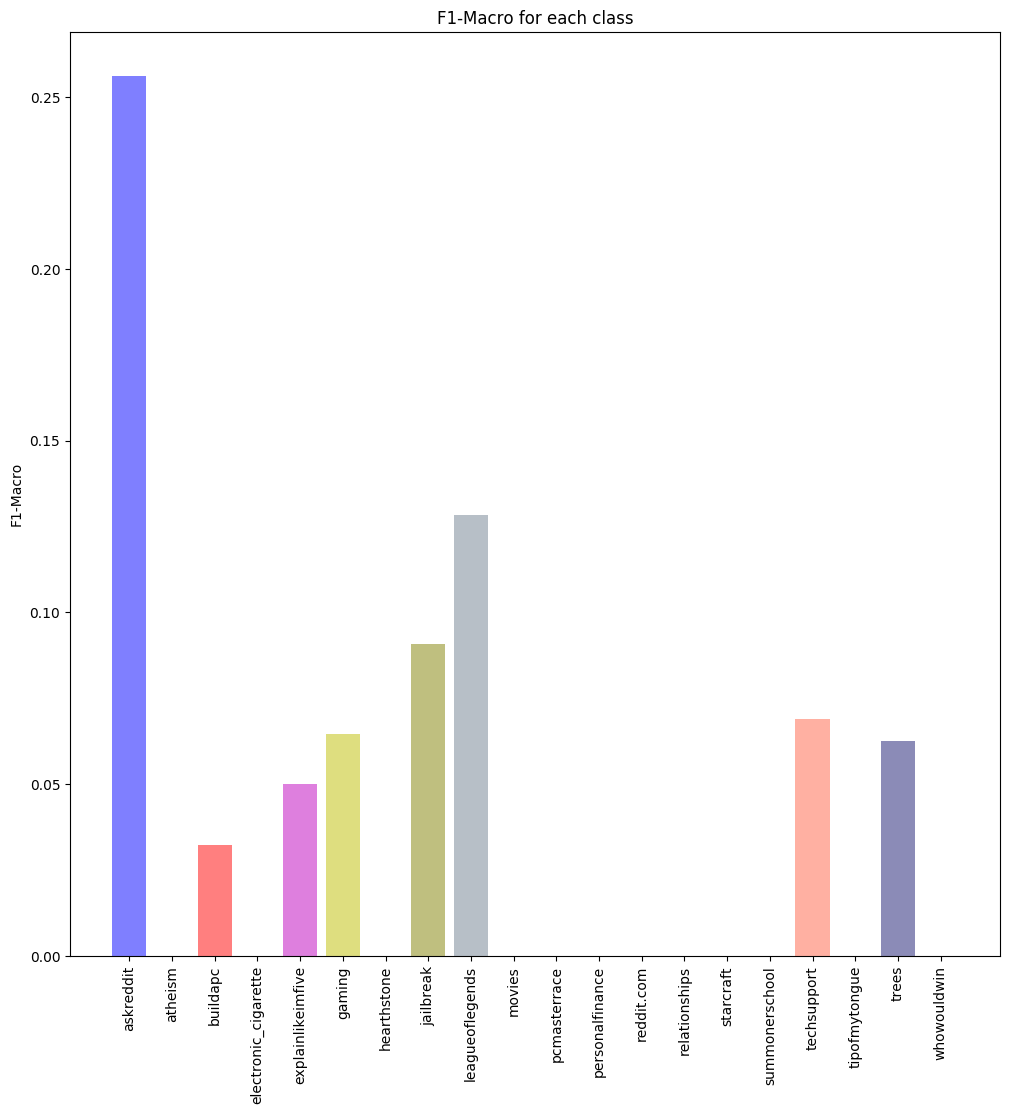

Classifier 'Dummy Prior' has Acc=0.093 P=0.039 R=0.038 F1=0.038
                      precision    recall  f1-score   support

           askreddit       0.25      0.26      0.26        80
             atheism       0.00      0.00      0.00        11
            buildapc       0.03      0.04      0.03        25
electronic_cigarette       0.00      0.00      0.00        13
   explainlikeimfive       0.07      0.04      0.05        26
              gaming       0.06      0.07      0.06        14
         hearthstone       0.00      0.00      0.00         6
           jailbreak       0.09      0.09      0.09        11
     leagueoflegends       0.15      0.11      0.13        61
              movies       0.00      0.00      0.00         5
        pcmasterrace       0.00      0.00      0.00        21
     personalfinance       0.00      0.00      0.00        13
          reddit.com       0.00      0.00      0.00         7
       relationships       0.00      0.00      0.00        14
     

In [0]:
from sklearn.dummy import DummyClassifier

dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(X_train, train_labels)
print(dummy_prior.score(X_test, test_labels))
evaluation_summary("Dummy Prior", dummy_prior.predict(X_test), test_labels)



0.23013698630136986
Evaluation for: Dummy Majority


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


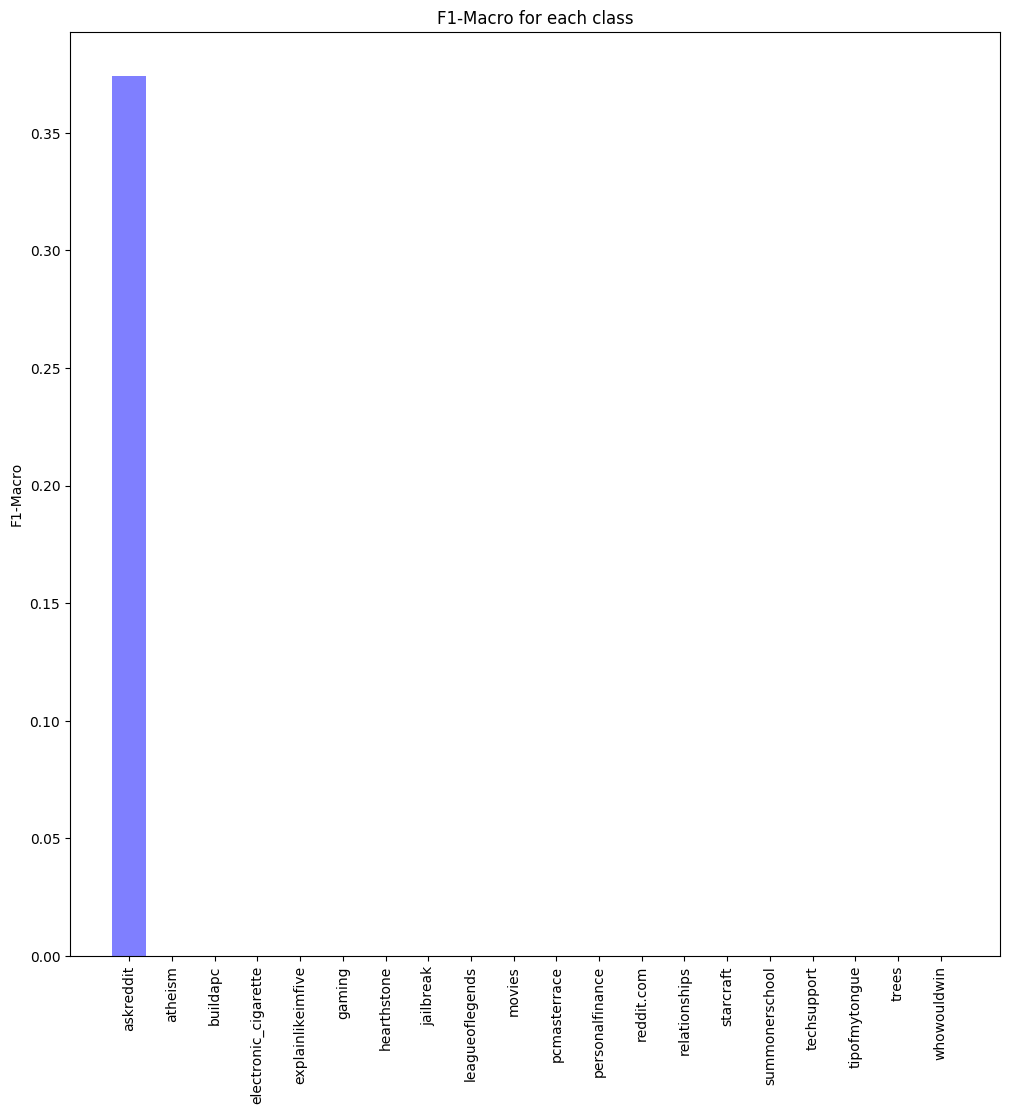

Classifier 'Dummy Majority' has Acc=0.230 P=0.050 R=0.012 F1=0.019
                      precision    recall  f1-score   support

           askreddit       1.00      0.23      0.37       365
             atheism       0.00      0.00      0.00         0
            buildapc       0.00      0.00      0.00         0
electronic_cigarette       0.00      0.00      0.00         0
   explainlikeimfive       0.00      0.00      0.00         0
              gaming       0.00      0.00      0.00         0
         hearthstone       0.00      0.00      0.00         0
           jailbreak       0.00      0.00      0.00         0
     leagueoflegends       0.00      0.00      0.00         0
              movies       0.00      0.00      0.00         0
        pcmasterrace       0.00      0.00      0.00         0
     personalfinance       0.00      0.00      0.00         0
          reddit.com       0.00      0.00      0.00         0
       relationships       0.00      0.00      0.00         0
  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(X_train, train_labels)
print(dummy_mf.score(X_test, test_labels))
evaluation_summary("Dummy Majority", dummy_mf.predict(X_test), test_labels)


# TfidfVectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Pass in the tokenizer as the tokenizer to the vectorizer.
# Create a one-hot encoding vectorizer.
Tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize)

In [0]:
Tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize)
train_tfidf_body = Tf_idf_vectorizer.fit_transform(train_feature_body)
test_tfidf_body = Tf_idf_vectorizer.transform(test_feature_body)

train_tfidf_title = Tf_idf_vectorizer.fit_transform(train_feature_title)
test_tfidf_title = Tf_idf_vectorizer.transform(test_feature_title)

train_tfidf_author = Tf_idf_vectorizer.fit_transform(train_feature_author)
test_tfidf_author = Tf_idf_vectorizer.transform(test_feature_author)

In [0]:
from scipy import sparse
X_train = sparse.hstack([train_tfidf_body,train_tfidf_title, train_tfidf_author])
X_test = sparse.hstack([test_tfidf_body, test_tfidf_title, test_tfidf_author ])


In [0]:
print(X_train.shape)

(1456, 28008)


## Log Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Evaluation for: TF_IDF_LOG


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


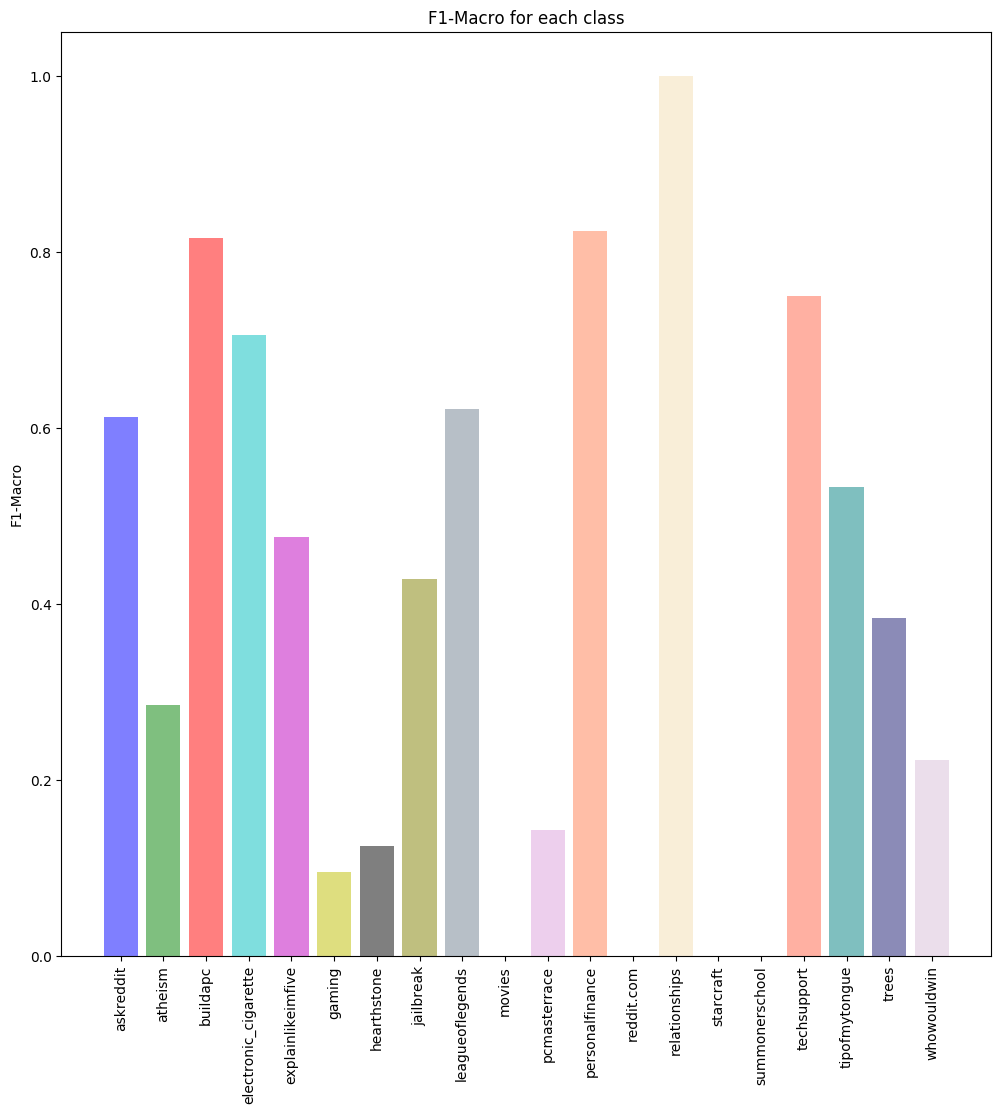

Classifier 'TF_IDF_LOG' has Acc=0.559 P=0.373 R=0.625 F1=0.401
                      precision    recall  f1-score   support

           askreddit       0.95      0.45      0.61       177
             atheism       0.17      1.00      0.29         2
            buildapc       0.84      0.79      0.82        39
electronic_cigarette       0.67      0.75      0.71         8
   explainlikeimfive       0.36      0.71      0.48         7
              gaming       0.06      0.25      0.10         4
         hearthstone       0.07      1.00      0.12         1
           jailbreak       0.27      1.00      0.43         3
     leagueoflegends       0.85      0.49      0.62        84
              movies       0.00      0.00      0.00         0
        pcmasterrace       0.09      0.40      0.14         5
     personalfinance       0.70      1.00      0.82         7
          reddit.com       0.00      0.00      0.00         0
       relationships       1.00      1.00      1.00         6
      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
clf_tf_log = LogisticRegression(solver='lbfgs').fit(X_train, train_labels)
res_tf_log = clf_tf_log.predict(X_test)
evaluation_summary("TF_IDF_LOG",res_tf_log, test_labels)

In [0]:
type(res_tf_log)

numpy.ndarray

## SVM

In [0]:
clf_sv_tf = SVC(gamma='auto', kernel = 'rbf')
clf_sv.fit(X_train, train_labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Evaluation for: TF_IDF_LOG


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


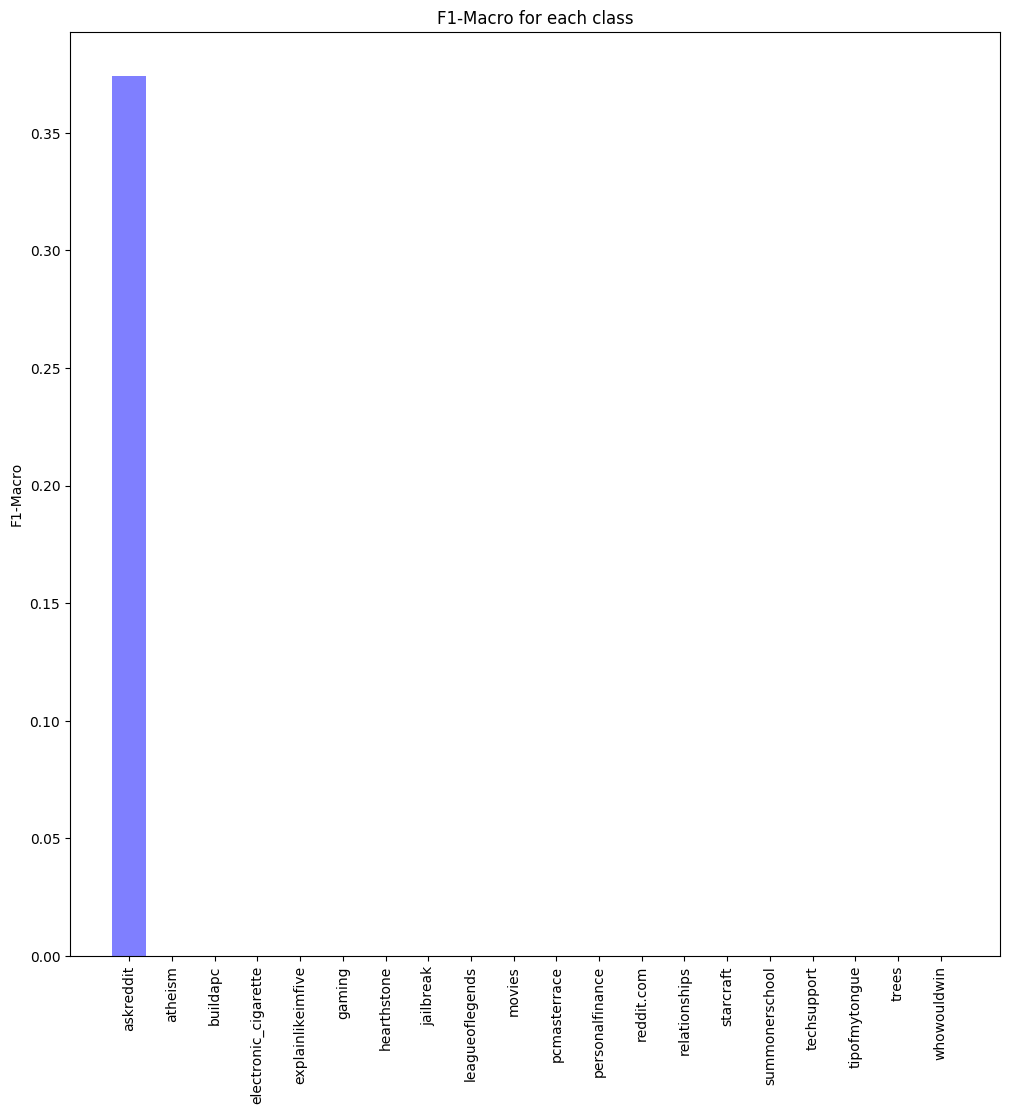

Classifier 'TF_IDF_LOG' has Acc=0.230 P=0.050 R=0.012 F1=0.019
                      precision    recall  f1-score   support

           askreddit       1.00      0.23      0.37       365
             atheism       0.00      0.00      0.00         0
            buildapc       0.00      0.00      0.00         0
electronic_cigarette       0.00      0.00      0.00         0
   explainlikeimfive       0.00      0.00      0.00         0
              gaming       0.00      0.00      0.00         0
         hearthstone       0.00      0.00      0.00         0
           jailbreak       0.00      0.00      0.00         0
     leagueoflegends       0.00      0.00      0.00         0
              movies       0.00      0.00      0.00         0
        pcmasterrace       0.00      0.00      0.00         0
     personalfinance       0.00      0.00      0.00         0
          reddit.com       0.00      0.00      0.00         0
       relationships       0.00      0.00      0.00         0
      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
res_clf_tf = clf_sv.predict(X_test)
evaluation_summary("TF_IDF_LOG",res_clf_tf, test_labels)

## Random Forest

In [0]:
clf_rf_tf= RandomForestClassifier(n_estimators=50, max_depth=5,random_state=0)
clf_rf_tf.fit(X_train, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Evaluation for: TF_IDF_LOG


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


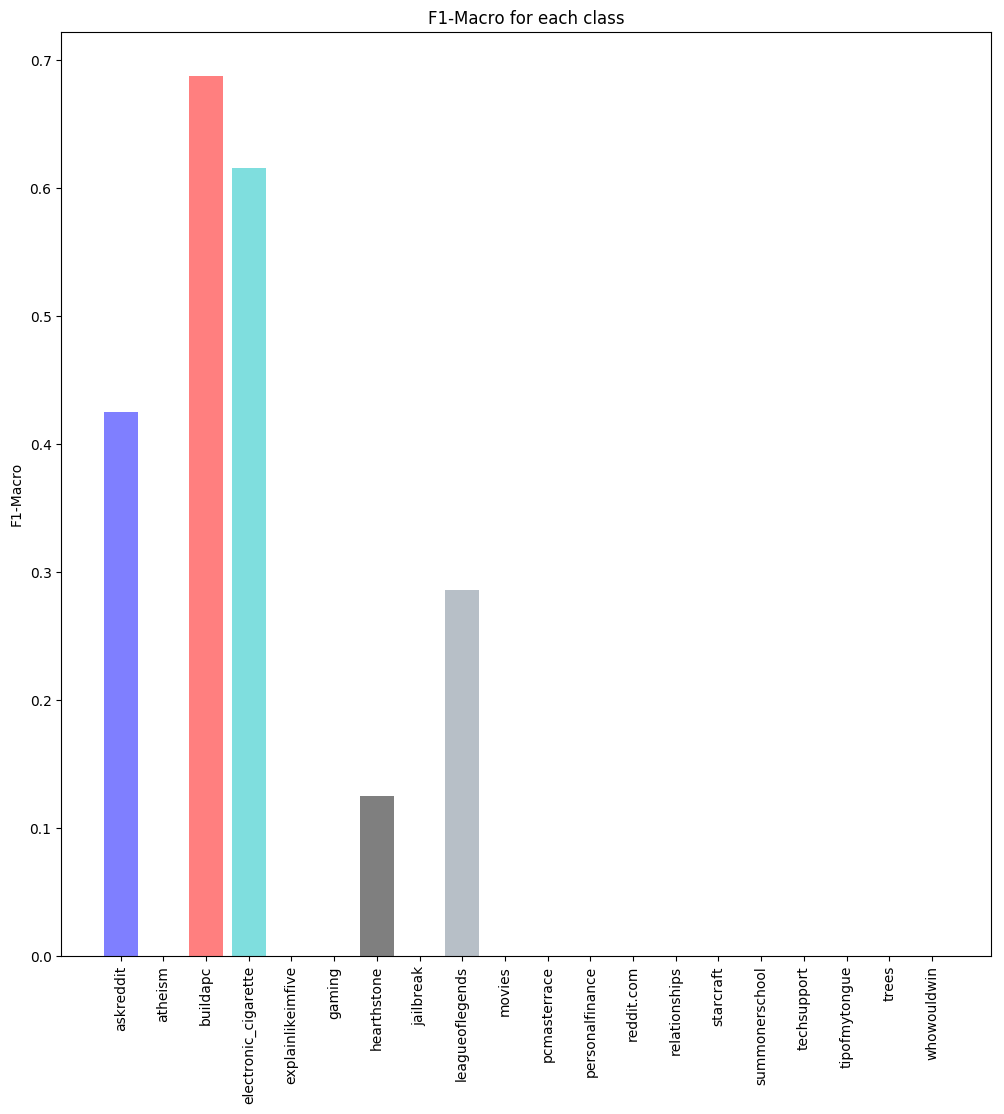

Classifier 'TF_IDF_LOG' has Acc=0.332 P=0.116 R=0.177 F1=0.107
                      precision    recall  f1-score   support

           askreddit       1.00      0.27      0.43       311
             atheism       0.00      0.00      0.00         0
            buildapc       0.59      0.81      0.69        27
electronic_cigarette       0.44      1.00      0.62         4
   explainlikeimfive       0.00      0.00      0.00         0
              gaming       0.00      0.00      0.00         0
         hearthstone       0.07      1.00      0.12         1
           jailbreak       0.00      0.00      0.00         0
     leagueoflegends       0.21      0.45      0.29        22
              movies       0.00      0.00      0.00         0
        pcmasterrace       0.00      0.00      0.00         0
     personalfinance       0.00      0.00      0.00         0
          reddit.com       0.00      0.00      0.00         0
       relationships       0.00      0.00      0.00         0
      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
res_clf_tf_rf = clf_rf_tf.predict(X_test)
evaluation_summary("TF_IDF_LOG",res_clf_tf_rf, test_labels)

## Dummy

0.08767123287671233
Evaluation for: Dummy Prior


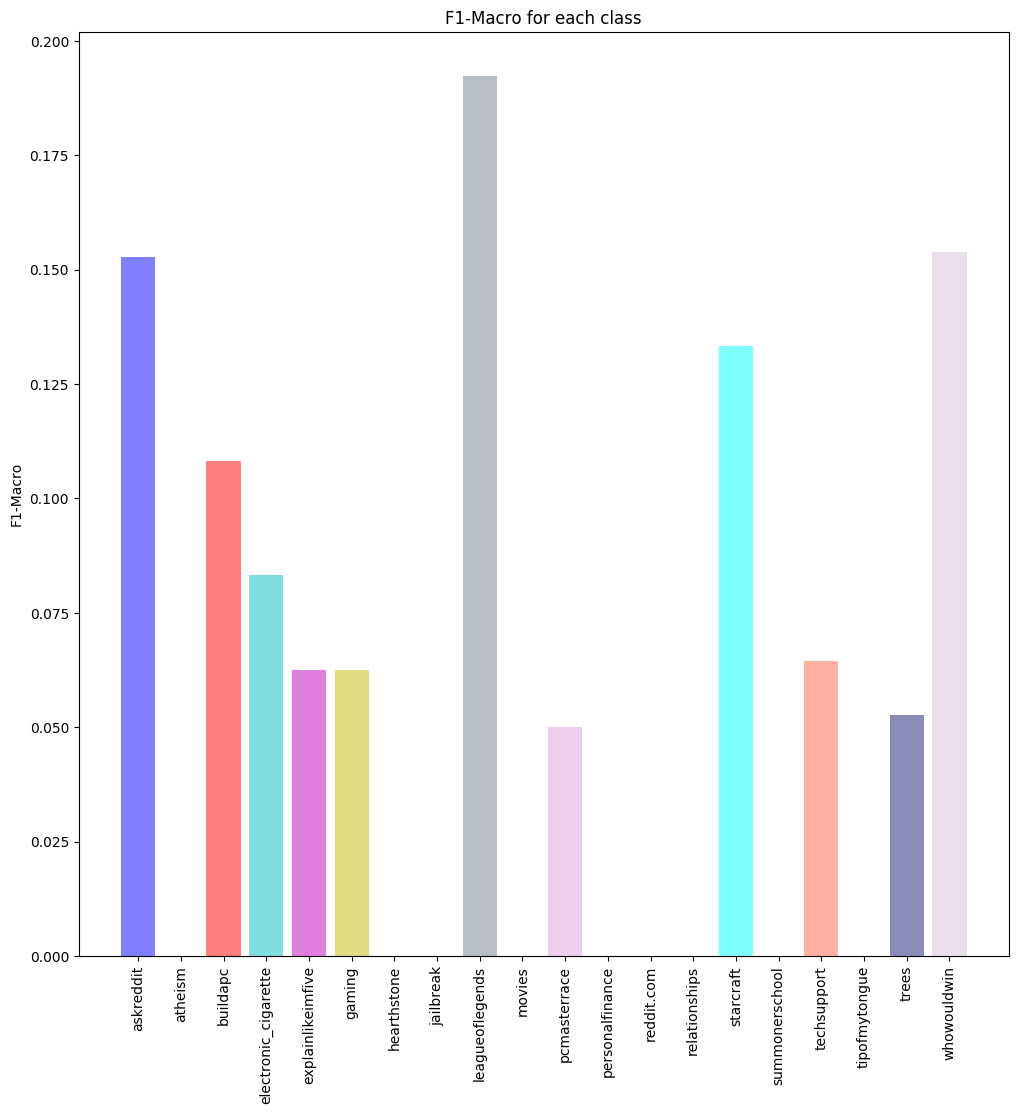

Classifier 'Dummy Prior' has Acc=0.093 P=0.055 R=0.060 F1=0.056
                      precision    recall  f1-score   support

           askreddit       0.14      0.16      0.15        73
             atheism       0.00      0.00      0.00         9
            buildapc       0.11      0.11      0.11        37
electronic_cigarette       0.11      0.07      0.08        15
   explainlikeimfive       0.07      0.06      0.06        18
              gaming       0.06      0.07      0.06        15
         hearthstone       0.00      0.00      0.00        13
           jailbreak       0.00      0.00      0.00         5
     leagueoflegends       0.21      0.18      0.19        56
              movies       0.00      0.00      0.00         8
        pcmasterrace       0.04      0.06      0.05        17
     personalfinance       0.00      0.00      0.00         8
          reddit.com       0.00      0.00      0.00         8
       relationships       0.00      0.00      0.00        13
     

In [0]:
from sklearn.dummy import DummyClassifier

dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(X_train, train_labels)
print(dummy_prior.score(X_test, test_labels))
evaluation_summary("Dummy Prior", dummy_prior.predict(X_test), test_labels)

0.23013698630136986
Evaluation for: Dummy Majority


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


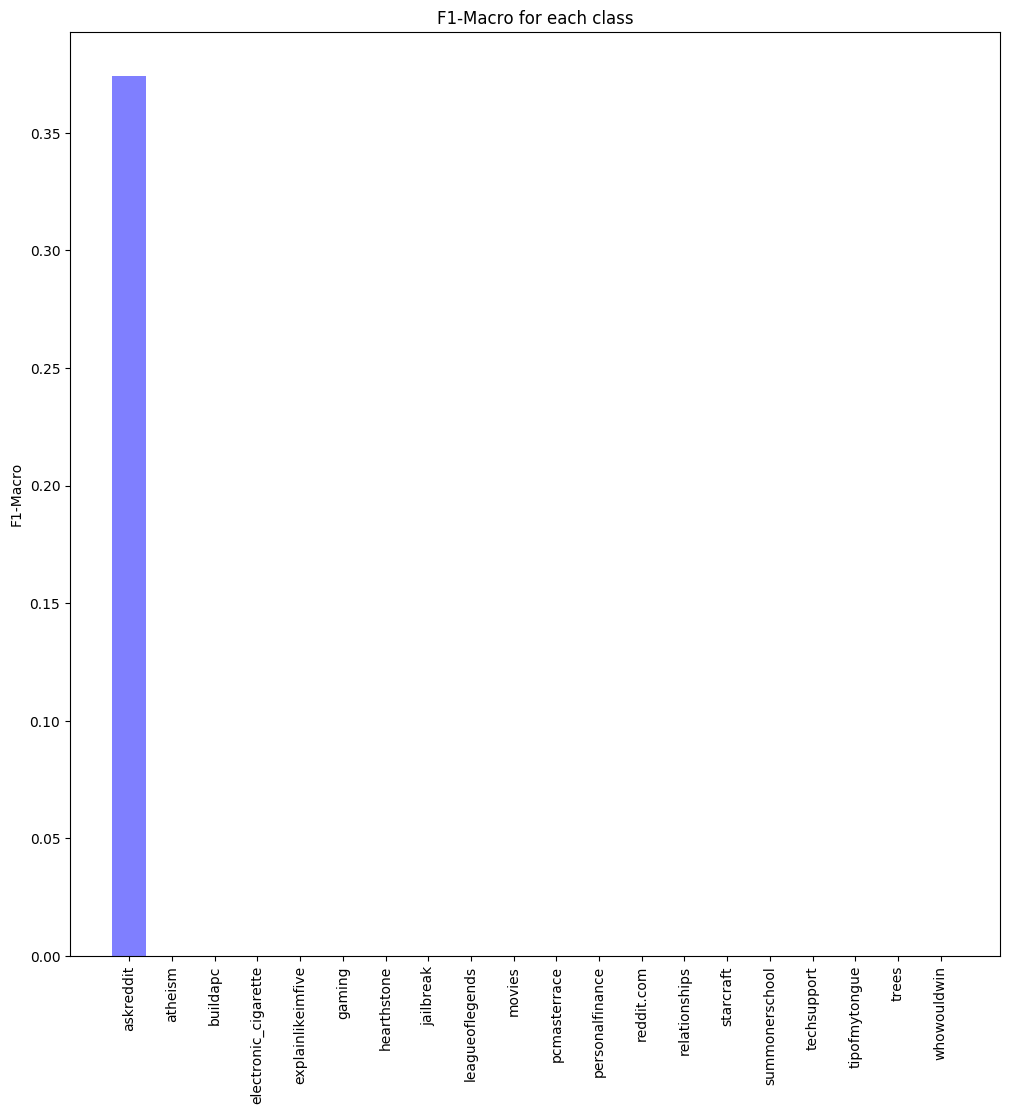

Classifier 'Dummy Majority' has Acc=0.230 P=0.050 R=0.012 F1=0.019
                      precision    recall  f1-score   support

           askreddit       1.00      0.23      0.37       365
             atheism       0.00      0.00      0.00         0
            buildapc       0.00      0.00      0.00         0
electronic_cigarette       0.00      0.00      0.00         0
   explainlikeimfive       0.00      0.00      0.00         0
              gaming       0.00      0.00      0.00         0
         hearthstone       0.00      0.00      0.00         0
           jailbreak       0.00      0.00      0.00         0
     leagueoflegends       0.00      0.00      0.00         0
              movies       0.00      0.00      0.00         0
        pcmasterrace       0.00      0.00      0.00         0
     personalfinance       0.00      0.00      0.00         0
          reddit.com       0.00      0.00      0.00         0
       relationships       0.00      0.00      0.00         0
  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(X_train, train_labels)
print(dummy_mf.score(X_test, test_labels))
evaluation_summary("Dummy Majority", dummy_mf.predict(X_test), test_labels)


# Grid Search

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Use FeatureUnion to combine the features from text and summary
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('Title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, )), 
              ])),
            ('Body', Pipeline([
              ('selector', ItemSelector(key='selected_body')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, )), 
              ])),
            ('author', Pipeline([
              ('selector', ItemSelector(key='selectedauthor')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, )), 
              ])),
        ])
        ),
    ('logreg', LogisticRegression())
    ])

In [0]:

#prediction_pipeline.fit(X_train, train_labels)
#evaluation_summary("LR", prediction_pipeline.predict(X_train), X_labels)                   

In [0]:
from sklearn.model_selection import GridSearchCV
#aproximately 400 models
params = {
    
   
#    'union__Title__Tf_idf__sublinear_tf': (False, True),
#    'union__Body__Tf_idf__sublinear_tf': (False, True),
#    'union__author__Tf_idf__sublinear_tf': (False, True),
#    'union__Title__Tf_idf__ngram_range':((1,2), (1,3)),
#    'union__Body__Tf_idf__ngram_range':((1,2), (1,3)),
#    'union__author__Tf_idf__ngram_range':((1,2), (1,3)),
#    'union__Title__Tf_idf__max_features':(25000,5000),
#    'union__Body__Tf_idf__max_features':(25000,5000),
#    'union__author__Tf_idf__max_features':(25000,5000),
   'logreg__C': (0.01, 10,1000),
   'logreg__multi_class': ('ovr', 'multinomial'),
   'logreg__solver': ('newton-cg', 'lbfgs')
    
}
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=2, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_threads, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [0]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [0]:
params = {
    
   
   'union__Title__Tf_idf__sublinear_tf': (False, True),
   'union__Body__Tf_idf__sublinear_tf': (False, True),
   'union__author__Tf_idf__sublinear_tf': (False, True),
   'union__Title__Tf_idf__ngram_range':((1,2), (1,3)),
   'union__Body__Tf_idf__ngram_range':((1,2), (1,3)),
   'union__author__Tf_idf__ngram_range':((1,2), (1,3)),
   'union__Title__Tf_idf__max_features':(25000,5000),
   'union__Body__Tf_idf__max_features':(25000,5000),
   'union__author__Tf_idf__max_features':(25000,5000),
#    'logreg__C': (1000),
#    'logreg__multi_class': ('ovr'),
#    'logreg__solver': ('sag')
    
}

In [0]:
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=2, verbose=1, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_threads, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [0]:
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('Title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
            ('Body', Pipeline([
              ('selector', ItemSelector(key='selected_body')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
            ('author', Pipeline([
              ('selector', ItemSelector(key='selectedauthor')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
        ])
        ),
    ('logreg', LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr'))
    ])

In [0]:
params = {
    
   
   'union__Title__Tf_idf__sublinear_tf': (False, True),
   'union__Body__Tf_idf__sublinear_tf': (False, True),
   'union__author__Tf_idf__sublinear_tf': (False, True),
   'union__Title__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__Body__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__author__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__Title__Tf_idf__max_features':(25000,5000),
   'union__Body__Tf_idf__max_features':(25000,5000),
   'union__author__Tf_idf__max_features':(25000,5000)
}

In [0]:
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_threads, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [0]:
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('Title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, ngram_range=(1,1)),sublinear_tf=False ), 
              ])),
            ('Body', Pipeline([
              ('selector', ItemSelector(key='selected_body')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, sublinear_tf=True)), 
              ])),
            ('author', Pipeline([
              ('selector', ItemSelector(key='selectedauthor')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize,  sublinear_tf= True )), 
              ])),
        ])
        ),
    ('logreg', LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr'))
    ])

In [0]:
params = {
    
   
#    'union__Title__Tf_idf__sublinear_tf': (False, True),
#    'union__Body__Tf_idf__sublinear_tf': (False, True),
#    'union__author__Tf_idf__sublinear_tf': (False, True),
#    'union__Title__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__Body__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__author__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__Title__Tf_idf__max_features':(25000,5000),
#    'union__Body__Tf_idf__max_features':(25000,5000),
#    'union__author__Tf_idf__max_features':(25000,5000)
}

In [0]:
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_threads, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [0]:
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('Title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize,  ngram_range=(1,1) ,sublinear_tf=False, max_features=25000)), 
              ])),
            ('Body', Pipeline([
              ('selector', ItemSelector(key='selected_body')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize,  sublinear_tf=True, ngram_range= (1,1) )), 
              ])),
            ('author', Pipeline([
              ('selector', ItemSelector(key='selectedauthor')),
              ('Tf_idf', TfidfVectorizer( sublinear_tf= True, ngram_range=(1,2) )), 
              ])),
        ])
        ),
    ('logreg', LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr'))
    ])

In [0]:
params = {
    
   
#    'union__Title__Tf_idf__sublinear_tf': (False, True),
#    'union__Body__Tf_idf__sublinear_tf': (False, True),
#    'union__author__Tf_idf__sublinear_tf': (False, True),
#    'union__Title__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
#    'union__Body__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
#    'union__author__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
#    'union__Title__Tf_idf__max_features':(25000,5000),
   'union__Body__Tf_idf__max_features':(25000,5000),
   'union__author__Tf_idf__max_features':(25000,5000)
}

In [0]:
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_threads, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

# Best Model After Grid Search

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average = 'macro')
  recall = recall_score(predictions, true_labels, average = 'macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels,1,average='macro') #1 means f_1 measure
  labels = unique_labels(test_labels, predictions)
  f1_ = fbeta_score(predictions, true_labels,1,average=None)
  y_pos = np.arange(len(labels))
  plt.figure(figsize=(12,12))
  performance = f1_
  plt.bar(y_pos, performance, align='center', alpha=0.5, color= ['b','g','r','c','m', 'y', 'k','olive','slategray','navy','plum', 'coral', 'salmon', 'wheat','aqua','orchid','tomato','teal','midnightblue','thistle'])

  plt.xticks(y_pos, labels,rotation=90)
  plt.ylabel('F1-Macro')
  plt.xlabel='subredits'
  plt.title('F1-Macro for each class')
  plt.show()
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels))
  
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


In [0]:
Tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize,  ngram_range=(1,1) ,sublinear_tf=False, max_features=25000)
train_tfidf_body = Tf_idf_vectorizer.fit_transform(train_threads.selected_body)
test_tfidf_body = Tf_idf_vectorizer.transform(test_threads.selected_body)

Tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize,  sublinear_tf=True, ngram_range= (1,1), max_features=5000 )
train_tfidf_title = Tf_idf_vectorizer.fit_transform(train_threads.title)
test_tfidf_title = Tf_idf_vectorizer.transform(test_threads.title)

Tf_idf_vectorizer = TfidfVectorizer( sublinear_tf= True, ngram_range=(1,2), max_features=5000 )
train_tfidf_author = Tf_idf_vectorizer.fit_transform(train_threads.selectedauthor)
test_tfidf_author = Tf_idf_vectorizer.transform(test_threads.selectedauthor)

In [0]:
X_train_best_1 = sparse.hstack([train_tfidf_body,train_tfidf_title,train_tfidf_author])
X_test_best_1 = sparse.hstack([test_tfidf_body,test_tfidf_title,test_tfidf_author])
best_log_clf_1 = LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr').fit(X_train_best_1, train_labels)
res_best_1 = best_log_clf_1.predict(X_test_best_1)


Evaluation for: Best_model_After_Grid_Search


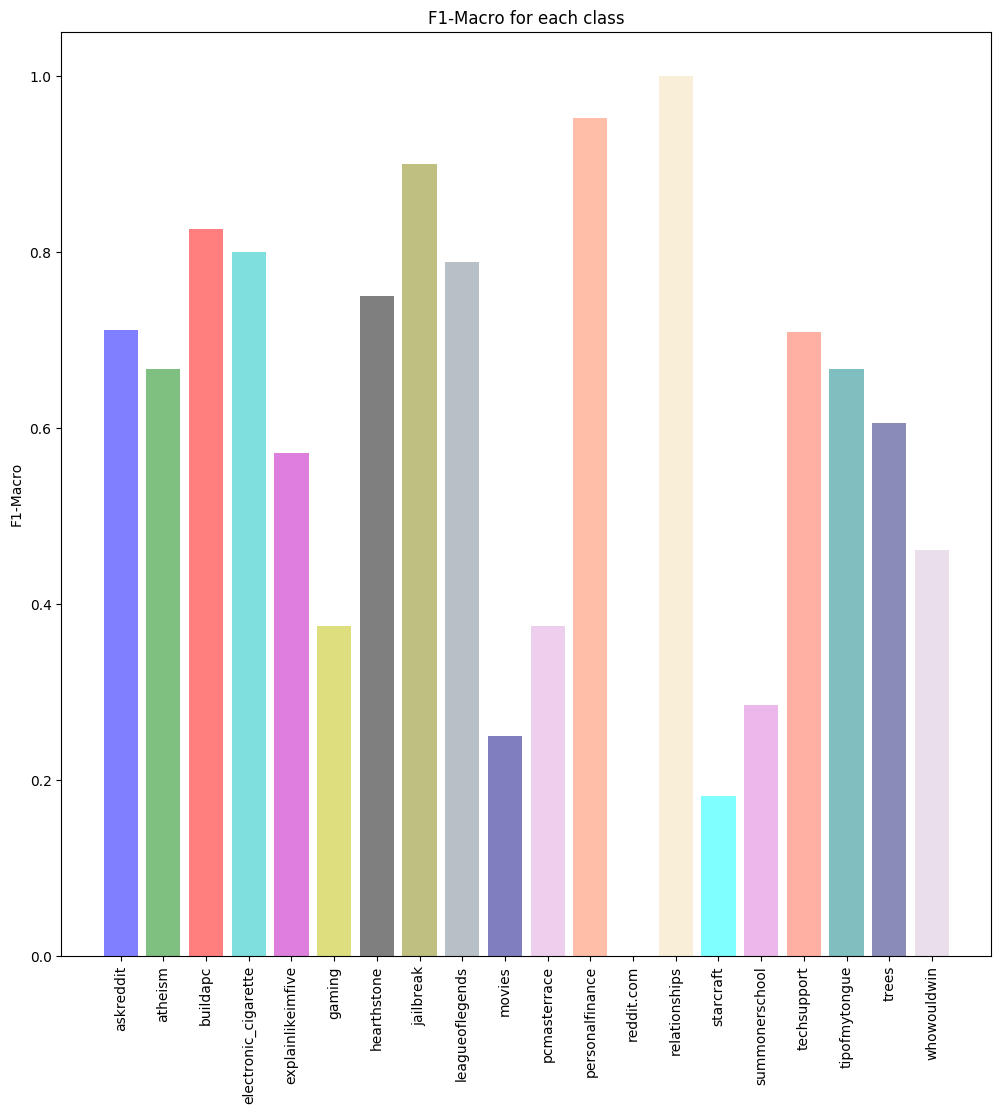

Classifier 'Best_model_After_Grid_Search' has Acc=0.685 P=0.568 R=0.728 F1=0.594
                      precision    recall  f1-score   support

           askreddit       0.89      0.59      0.71       127
             atheism       0.50      1.00      0.67         6
            buildapc       0.84      0.82      0.83        38
electronic_cigarette       0.89      0.73      0.80        11
   explainlikeimfive       0.57      0.57      0.57        14
              gaming       0.35      0.40      0.38        15
         hearthstone       0.60      1.00      0.75         9
           jailbreak       0.82      1.00      0.90         9
     leagueoflegends       0.90      0.70      0.79        61
              movies       0.20      0.33      0.25         3
        pcmasterrace       0.26      0.67      0.38         9
     personalfinance       1.00      0.91      0.95        11
          reddit.com       0.00      0.00      0.00         1
       relationships       1.00      1.00      1.0

In [0]:
evaluation_summary("Best_model_After_Grid_Search", res_best_1, test_labels)

# Confusion Matrix

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#code from CM documentation from sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontweight='bold', fontsize=20)
    plt.xlabel('Predicted label', fontweight='bold', fontsize=20)

In [0]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(test_labels, res_best_1)
plot_confusion_matrix(confusion_matrix(test_labels,res_best_1),labels)

# ERROR ANALYSIS

In [0]:
#got the all the threads of LoL that didnt retrieved/predict from my classifier
res = test_threads.posts[(test_threads.subreddit=='gaming')*(pred_ != 'gaming')]
for l in res:
  for p in l:
    if 'body' in p:
      print(p['body'])

In [0]:
res = test_threads.posts[(test_threads.subreddit=='movies')*(pred_ != 'movies')]
for l in res:
  for p in l:
    if 'body' in p:
      print(p['body'])

In [0]:
res = test_threads.posts[(test_threads.subreddit=='pcmasterrace')*(pred_ != 'pcmasterrace')]
for l in res:
  for p in l:
    if 'body' in p:
      print(p['body'])

In [0]:
res = test_threads.posts[(test_threads.subreddit=='reddit.com')*(pred_ != 'reddit.com')]
for l in res:
  for p in l:
    if 'body' in p:
      print(p['body'])

In [0]:
res = test_threads.posts[(test_threads.subreddit=='starcraft')*(pred_ != 'startcraft')]
for l in res:
  for p in l:
    if 'body' in p:
      print(p['body'])

In [0]:
res = test_threads.posts[(test_threads.subreddit=='starcraft')*(pred_ != 'startcraft')]
for l in res:
  for p in l:
    if 'body' in p:
      print(p['body'])

# Random Grid

In [0]:
params = {
    
   
   'union__Title__Tf_idf__sublinear_tf': (False, True),
   'union__Body__Tf_idf__sublinear_tf': (False, True),
   'union__author__Tf_idf__sublinear_tf': (False, True),
   'union__Title__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__Body__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__author__Tf_idf__ngram_range':((1, 1),(1,2), (1,3)),
   'union__Title__Tf_idf__max_features':(25000,5000),
   'union__Body__Tf_idf__max_features':(25000,5000),
   'union__author__Tf_idf__max_features':(25000,5000),
   'logreg__C': (0.01, 10,1000),
   'logreg__multi_class': ('ovr', 'multinomial'),
   'logreg__solver': ('newton-cg', 'lbfgs', 'sag', 'saga')
    
}

In [0]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
random_search  = RandomizedSearchCV(prediction_pipeline, param_distributions=params, n_jobs=1, n_iter= 60, verbose=2, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
random_search.fit(train_threads, train_labels)


In [0]:
print("Best score: %0.3f" % random_search.best_score_)
print("Best parameters set:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

# Extra Features

## Length of post and Thread

In [0]:
#Title, body, id
#['is_self_post', 'posts', 'subreddit', 'title', 'url']
# this code calculates the len of the post
posts_feature = train_threads['posts']
train_feature_body_l = []
train_feature_thread_l = []
i=0
print(len(posts_feature))
for p in posts_feature:
  body_len = 0
  count = 0
  train_feature_thread_l.append(len(p))
  for l in p:
    if 'body' in l:
      body_len = body_len+len(l['body'])
      count= count+1
    
  train_feature_body_l.append(body_len/count)


train_threads['body_len'] = train_feature_body_l
train_threads['thread_len'] = train_feature_thread_l

In [0]:
train_threads['thread_len'].shape

In [0]:
#Title, body, id
#['is_self_post', 'posts', 'subreddit', 'title', 'url']
# this code calculates the len of the post
posts_feature = test_threads['posts']
test_feature_body_l = []
test_feature_thread_l = []

for p in posts_feature:
  body_len = 0
  count = 0
  test_feature_thread_l.append(len(p))
  for l in p:
    if 'body' in l:
      body_len = body_len+len(l['body'])
      count= count+1
    
  test_feature_body_l.append(body_len/count)


test_threads['body_len'] = test_feature_body_l
test_threads['thread_len'] = test_feature_thread_l

In [0]:
train_feature_body_l = np.asarray(train_feature_body_l)
train_feature_thread_l = np.asarray(train_feature_thread_l)

In [0]:
test_feature_body_l = np.asarray(test_feature_body_l)
test_feature_thread_l = np.asarray(test_feature_thread_l)

## Word embeding

In [0]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class AverageEmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
        self.dimension = 300
        
    def fit(self, X, y):
        return self
      
    def transform(self, X):  
      # Skip OOV terms. 
      # Return 0 for all dimensions if no words are in the vocabulary.
      dense_matrix =  np.array([ 
          np.mean([token.vector for token in self.tokenizer(doc) if not token.is_oov]
                or [np.zeros(self.dimension)], axis=0)
          for doc in X
      ])
      return dense_matrix

In [0]:
embedding_vectorizer = AverageEmbeddingTransformer(spacy_tokenize)
train_embedding_features = embedding_vectorizer.transform(train_threads['selected_body'])
test_embedding_features = embedding_vectorizer.transform(test_threads['selected_body'])

In [0]:
from scipy.sparse import csr_matrix
train_sparse_embeddings = csr_matrix(train_embedding_features)
test_sparse_embeddings = csr_matrix(test_embedding_features)
type(test_embedding_features)

In [0]:
train_threads['train_sparse_embeddings'] = train_sparse_embeddings
test_threads['test_sparse_embeddings'] = test_sparse_embeddings

# BEST MODEL EXTRA FEATURES

## EXTRAS

In [0]:

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average = 'macro')
  recall = recall_score(predictions, true_labels, average = 'macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels,1,average='macro') #1 means f_1 measure
  labels = unique_labels(test_labels, predictions)
  f1_ = fbeta_score(predictions, true_labels,1,average=None)
  y_pos = np.arange(len(labels))
  plt.figure(figsize=(12,12))
  performance = f1_
  plt.bar(y_pos, performance, align='center', alpha=0.5, color= ['b','g','r','c','m', 'y', 'k','olive','slategray','navy','plum', 'coral', 'salmon', 'wheat','aqua','orchid','tomato','teal','midnightblue','thistle'])

  plt.xticks(y_pos, labels,rotation=90)
  plt.ylabel('F1-Macro')
  plt.xlabel='subredits'
  plt.title('F1-Macro for each class')
  plt.show()
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels))
  
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


In [0]:
test_threads['body_len'] = test_feature_body_l
test_threads['thread_len'] = test_feature_thread_l

In [0]:
train_threads['body_len'] = train_feature_body_l
train_threads['thread_len'] = train_feature_thread_l

train_threads['train_sparse_embeddings'] = train_sparse_embeddings
test_threads['test_sparse_embeddings'] = test_sparse_embeddings

## Extra Feature Combinations : body_len + Word_Embeding

In [0]:
X_train_best_extra_1 = sparse.hstack([train_tfidf_body,train_tfidf_title,train_tfidf_author,csr_matrix(train_threads.body_len.reshape((1456, 1))), train_sparse_embeddings])
X_test_best_extra_1 = sparse.hstack([test_tfidf_body, test_tfidf_title, test_tfidf_author, csr_matrix(test_threads.body_len.reshape((365, 1))), test_sparse_embeddings])

In [0]:
best_extra_1 = LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr').fit(X_train_best_extra_1, train_labels)
res_extra_1 = best_extra_1.predict(X_test_best_extra_1)


In [0]:
len(res_extra_1)

In [0]:
evaluation_summary("Best_model_extra_body_len_word_embeding", res_extra_1, test_labels)

## Extra Feature Combinations : len_thread + Word_Embeding

In [0]:
X_train_best_extra_2 = sparse.hstack([train_tfidf_body,train_tfidf_title,train_tfidf_author, train_feature_thread_l[:,np.newaxis], train_sparse_embeddings])
X_test_best_extra_2 = sparse.hstack([test_tfidf_body,test_tfidf_title,test_tfidf_author,test_feature_thread_l[:,np.newaxis], test_sparse_embeddings])

In [0]:
best_extra_2 = LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr').fit(X_train_best_extra_2, train_labels)
res_extra_2 = best_extra_2.predict(X_test_best_extra_2)
evaluation_summary("Best_model_extra_thread_len_word_embeding", res_extra_2, test_labels)

## Extra Feature Combinations : len_thread +body_len

In [0]:
X_train_best_extra_3 = sparse.hstack([train_tfidf_body,train_tfidf_title,train_tfidf_author, train_feature_thread_l[:,np.newaxis],train_feature_body_l[:,np.newaxis] ])
X_test_best_extra_3 = sparse.hstack([test_tfidf_body,test_tfidf_title,test_tfidf_author,test_feature_thread_l[:,np.newaxis],test_feature_body_l[:,np.newaxis] ])

In [0]:
best_extra_3 = LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr').fit(X_train_best_extra_3, train_labels)
res_extra_3 = best_extra_3.predict(X_test_best_extra_3)
evaluation_summary("Best_model_extra_thread_len_body_len", res_extra_3, test_labels)


## Extra Feature Combinations : Only Word Embending

In [0]:
X_train_best_extra_4 = sparse.hstack([train_tfidf_body,train_tfidf_title,train_tfidf_author, train_sparse_embeddings  ])
X_test_best_extra_4 = sparse.hstack([test_tfidf_body,test_tfidf_title,test_tfidf_author, test_sparse_embeddings  ])

In [0]:
best_extra_4 = LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr').fit(X_train_best_extra_4, train_labels)
res_extra_4 = best_extra_4.predict(X_test_best_extra_4)
evaluation_summary("Best_model_extra_Word_Embending", res_extra_4, test_labels)


###Confusion Matrix

In [0]:
labels = unique_labels(test_labels, res_extra_4)
plot_confusion_matrix(confusion_matrix(test_labels,res_extra_4),labels)

## Extra Feature Combinations : all

In [0]:
X_train_best_extra_5 = sparse.hstack([train_tfidf_body,train_tfidf_title,train_tfidf_author,train_feature_body_l[:,np.newaxis], train_feature_thread_l[:,np.newaxis], train_sparse_embeddings])
X_test_best_extra_5 = sparse.hstack([test_tfidf_body,test_tfidf_title,test_tfidf_author,test_feature_body_l[:,np.newaxis], test_feature_thread_l[:,np.newaxis], test_sparse_embeddings])

In [0]:
best_extra_5 = LogisticRegression(solver = 'newton-cg', C=1000, multi_class='ovr').fit(X_train_best_extra_5, train_labels)
res_extra_5 = best_extra_5.predict(X_test_best_extra_5)
evaluation_summary("Best_model_len_thread_body_len_Word_Embending", res_extra_5, test_labels)

In [0]:
labels = unique_labels(test_labels, res_extra_5)
plot_confusion_matrix(confusion_matrix(test_labels,res_extra_5),labels)

# Part B: Discourse prediction ##

In [0]:
discourse_train = "coursework_discourse_train.json"
discourse_test = "coursework_discourse_test.json"
  
!gsutil cp gs://textasdata/coursework/coursework_discourse_train.json $discourse_train  
!gsutil cp gs://textasdata/coursework/coursework_discourse_test.json  $discourse_test

Copying gs://textasdata/coursework/coursework_discourse_train.json...
\ [1 files][ 60.2 MiB/ 60.2 MiB]                                                
Operation completed over 1 objects/60.2 MiB.                                     
Copying gs://textasdata/coursework/coursework_discourse_test.json...
- [1 files][ 15.1 MiB/ 15.1 MiB]                                                
Operation completed over 1 objects/15.1 MiB.                                     


In [0]:
# The reddit thread structure is nested with posts in a new content.
# This block reads the file as json and creates a new data frame.
import pandas as pd
import json

def load_posts(file):
  # A temporary variable to store the list of post content.
  posts_tmp = list()

  with open(file) as jsonfile:
    for i, line in enumerate(jsonfile):
     # if (i > 2): break
      thread = json.loads(line)
      for post in thread['posts']:
        # NOTE: This could be changed to use additional features from the post or thread.
        # DO NOT change the labels for the test set.
        posts_tmp.append((thread['subreddit'], thread['title'], thread['url'],
                        post['id'], post.get('author', ""), post.get('body', ""), post.get("majority_link", ""), 
                        post.get('post_depth', 0), post.get('majority_type', ""), # discourse type label 
                        post.get('in_reply_to', "") ))

# Create the posts data frame.  
  labels = ['subreddit', 'title', 'url', 'id', 'author', 'body', 'majority_link', 
          'post_depth', 'discourse_type', 'in_reply_to']
  return pd.DataFrame(posts_tmp, columns=labels)

In [0]:
train_posts = load_posts(discourse_train)
# Filter out empty labels
train_posts = train_posts[train_posts['discourse_type'] != ""]
print(train_posts.head())
print("Num posts: ", train_posts.size)

    subreddit                           title  \
0  worldofpvp  Help me decide my new PvP main   
1  worldofpvp  Help me decide my new PvP main   
2  worldofpvp  Help me decide my new PvP main   
3  worldofpvp  Help me decide my new PvP main   
4  worldofpvp  Help me decide my new PvP main   

                                                 url          id  \
0  https://www.reddit.com/r/worldofpvp/comments/2...   t3_2v0anq   
1  https://www.reddit.com/r/worldofpvp/comments/2...  t1_codb2p9   
2  https://www.reddit.com/r/worldofpvp/comments/2...  t1_codg0we   
3  https://www.reddit.com/r/worldofpvp/comments/2...  t1_coeatsq   
4  https://www.reddit.com/r/worldofpvp/comments/2...  t1_codbyit   

         author                                               body  \
0      TyrickEU  Hi. \nAs a raider previously, i had no problem...   
1          vurt  [deleted]  \n ^^^^^^^^^^^^^^^^0.5422 \n > [Wha...   
2   OptimusNice  This goes mostly for 3v3 since that seems to b...   
3               

The label for the post we will be predicting is in the discourse_type column.

In [0]:
test_posts = load_posts(discourse_test)
# Filter out empty labels
test_posts = test_posts[test_posts['discourse_type'] != ""]
print("Num posts: ", test_posts.size)


Num posts:  198120


In [0]:
train_labels = train_posts['discourse_type']
test_labels = test_posts['discourse_type']

Examine the distribution over labels on the training data.

In [0]:
discourse_counts = train_labels.value_counts()
print(discourse_counts.describe())

top_discourse = discourse_counts.nlargest(200)
print(top_discourse)
top_discourse = top_discourse.index.tolist()
print(top_discourse)

count       10.000000
mean      7926.700000
std       9664.321866
min       1266.000000
25%       1671.500000
50%       3235.500000
75%      11919.750000
max      31419.000000
Name: discourse_type, dtype: float64
answer              31419
elaboration         14775
question            13610
appreciation         6849
agreement            3868
disagreement         2603
humor                1787
other                1633
announcement         1457
negativereaction     1266
Name: discourse_type, dtype: int64
['answer', 'elaboration', 'question', 'appreciation', 'agreement', 'disagreement', 'humor', 'other', 'announcement', 'negativereaction']


In [0]:
train_posts[train_posts['discourse_type']=='humor'].head(20)

,subreddit,title,url,id,author,body,majority_link,post_depth,discourse_type,in_reply_to
66,askreddit,What do you do to calm your brain down when yo...,https://www.reddit.com/r/AskReddit/comments/3b...,t1_csmwndt,,How am I supposed to concentrate when I'm gett...,t1_csmve7t,3,humor,t1_csmve7t
134,asoiaf,"(Spoilers Written) During Robert's reign, how ...",https://www.reddit.com/r/asoiaf/comments/3z0lj...,t1_cyimq57,Altair1192,Stannis the Lannis? \n\nEdit: No offence but t...,t1_cyihr0z,4,humor,t1_cyigxd5
135,asoiaf,"(Spoilers Written) During Robert's reign, how ...",https://www.reddit.com/r/asoiaf/comments/3z0lj...,t1_cyiozx8,SaxonCamel,>stammering half-wit\n\nLike Emperor ~~T-t-t-t...,t1_cyimq57,5,humor,t1_cyimq57
150,asoiaf,"(Spoilers Written) During Robert's reign, how ...",https://www.reddit.com/r/asoiaf/comments/3z0lj...,t1_cyimyy1,Altair1192,Tywinosaurous Wrecks! Everyone will bend the k...,,1,humor,t3_3z0lj6
187,shittyadvice,How can I make my baby look younger?,https://www.reddit.com/r/shittyadvice/comments...,t1_c6lehow,,Whittle it down to a ball of cells.,t3_11cqux,1,humor,t3_11cqux
188,shittyadvice,How can I make my baby look younger?,https://www.reddit.com/r/shittyadvice/comments...,t1_c6lw3lz,,stop dressing her up like a hooker and use les...,t3_11cqux,1,humor,t3_11cqux
189,shittyadvice,How can I make my baby look younger?,https://www.reddit.com/r/shittyadvice/comments...,t1_c6lxze2,,anti aging cream,t3_11cqux,1,humor,t3_11cqux
405,askreddit,How would you explain Occam's Razor?,https://www.reddit.com/r/AskReddit/comments/yp...,t1_c5xm6iq,,Never knew the guy. No idea how he shaved.,t3_ypbt7,1,humor,t3_ypbt7
479,rupaulsdragrace,Who shows the most well-rounded C.U.N.T.? (Spo...,https://www.reddit.com/r/rupaulsdragrace/comme...,t1_cqz088q,taint-licker,Chicken girl- Miss Fame's long lost lover. She...,t1_cqyzqkw,2,humor,t1_cqyzqkw
498,angelsbaseball,7/2 Cardinals @ Angels [Game Thread],https://www.reddit.com/r/angelsbaseball/commen...,t1_cauv6uq,naaahhman,"TOO MUCH OPTIMISM OUT OF YOU, THANKS IN ADVANC...",t1_cauum8m,2,humor,t1_cauum8m


## Creating the Train AND Test data

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize)
train_tfidf_comment_body = Tf_idf_vectorizer.fit_transform(train_posts['body'])
test_tfidf_comment_body = Tf_idf_vectorizer.transform(test_posts['body'])

train_tfidf_comment_subreddit = Tf_idf_vectorizer.fit_transform(train_posts['subreddit'])
test_tfidf_comment_subreddit = Tf_idf_vectorizer.transform(test_posts['subreddit'])

train_tfidf_comment_author = Tf_idf_vectorizer.fit_transform(train_posts['author'])
test_tfidf_comment_author = Tf_idf_vectorizer.transform(test_posts['author'])

In [0]:
from scipy import sparse
X_train = sparse.hstack([train_tfidf_comment_body,train_tfidf_comment_subreddit, train_tfidf_comment_author])
X_test = sparse.hstack([test_tfidf_comment_body, test_tfidf_comment_subreddit, test_tfidf_comment_author ])
print(X_train.shape)
print(X_test.shape)

(79267, 105663)
(19812, 105663)


##Dummy classifier

In [0]:
# Define the features



from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='stratified',random_state=0)
clf.fit(X_train, train_posts['discourse_type'])
predictions = clf.predict(X_test)  
print(classification_report(predictions, test_posts['discourse_type']))

                  precision    recall  f1-score   support

       agreement       0.05      0.06      0.06       934
    announcement       0.02      0.02      0.02       382
          answer       0.39      0.39      0.39      7910
    appreciation       0.08      0.08      0.08      1603
    disagreement       0.04      0.03      0.04       686
     elaboration       0.19      0.18      0.19      3711
           humor       0.02      0.02      0.02       449
negativereaction       0.03      0.03      0.03       297
           other       0.02      0.02      0.02       395
        question       0.17      0.17      0.17      3445

       micro avg       0.23      0.23      0.23     19812
       macro avg       0.10      0.10      0.10     19812
    weighted avg       0.23      0.23      0.23     19812



##Logistic Regression

In [0]:
def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average = 'macro')
  recall = recall_score(predictions, true_labels, average = 'macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels,1,average='macro') #1 means f_1 measure
  labels = unique_labels(test_posts['discourse_type'], predictions)
  f1_ = fbeta_score(predictions, true_labels,1,average=None)
  y_pos = np.arange(len(labels))
  plt.figure(figsize=(12,12))
  performance = f1_
  plt.bar(y_pos, performance, align='center', alpha=0.5, color= ['g','r','c','m', 'y', 'k','olive','slategray','navy','teal'])

  plt.xticks(y_pos, labels,rotation=90)
  plt.ylabel('F1-Macro')
  plt.xlabel='subredits'
  plt.title('F1-Macro for each class')
  plt.show()
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels))
  
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

#code from CM documentation from sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

Evaluation for: TF_IDF_LOG_Posts


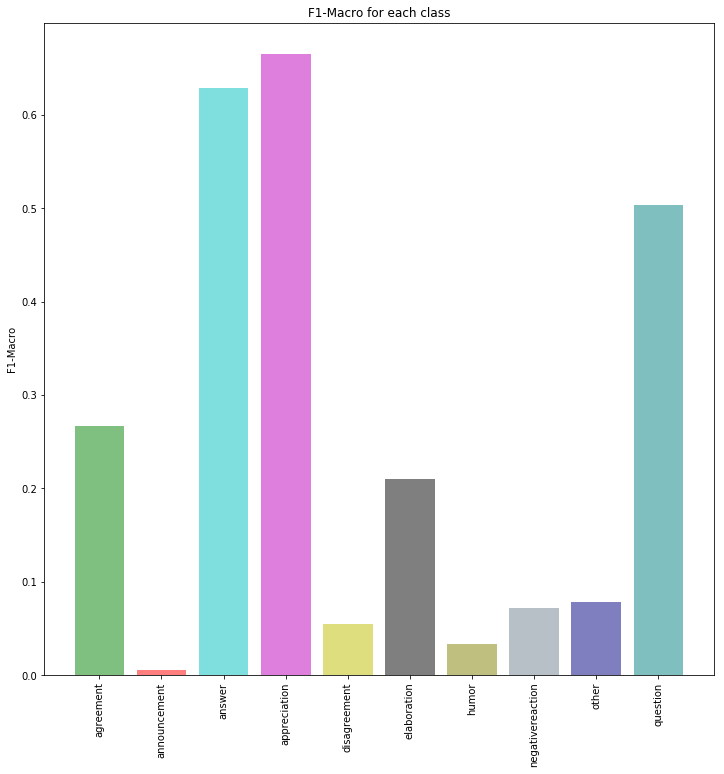

Classifier 'TF_IDF_LOG_Posts' has Acc=0.507 P=0.236 R=0.454 F1=0.252
                  precision    recall  f1-score   support

       agreement       0.18      0.52      0.27       325
    announcement       0.00      0.33      0.01         3
          answer       0.84      0.50      0.63     13218
    appreciation       0.59      0.76      0.67      1328
    disagreement       0.03      0.33      0.05        58
     elaboration       0.16      0.29      0.21      2021
           humor       0.02      0.27      0.03        30
negativereaction       0.04      0.48      0.07        25
           other       0.04      0.48      0.08        33
        question       0.45      0.56      0.50      2771

       micro avg       0.51      0.51      0.51     19812
       macro avg       0.24      0.45      0.25     19812
    weighted avg       0.68      0.51      0.56     19812


Confusion matrix:
 [[ 170    0  524   43    3  128    1    1    2   79]
 [   2    1  266   12    1   49    1    0  

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels

clf_tf_log = LogisticRegression(solver='lbfgs').fit(X_train, train_posts['discourse_type'])
res_tf_log = clf_tf_log.predict(X_test)
evaluation_summary("TF_IDF_LOG_Posts",res_tf_log, test_posts['discourse_type'])



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontweight='bold', fontsize=20)
   

Confusion matrix, without normalization


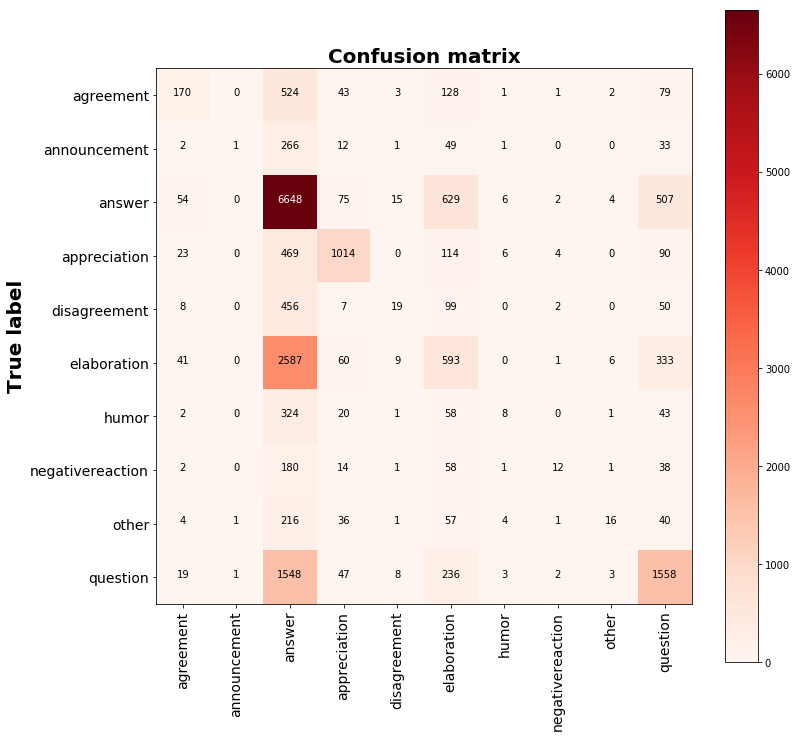

In [0]:
labels = unique_labels(test_posts['discourse_type'], res_tf_log)
plot_confusion_matrix(confusion_matrix(test_posts['discourse_type'],res_tf_log),labels)

## Random Grid_Search

In [0]:
params = {
    
   
   'union__title__Tf_idf__sublinear_tf': (False, True),
   'union__Body__Tf_idf__sublinear_tf': (False, True),
   'union__author__Tf_idf__sublinear_tf': (False, True),
   'union__title__Tf_idf__ngram_range':((1, 1),(1,2)),
   'union__Body__Tf_idf__ngram_range':((1, 1),(1,2)),
   'union__title__Tf_idf__max_features':(25000,5000),
   'union__Body__Tf_idf__max_features':(25000,5000),
   'union__author__Tf_idf__max_features':(25000,5000),
   'logreg__C': (0.01, 10,1000),
   'logreg__multi_class': ('ovr', 'multinomial'),
   'logreg__solver': ('newton-cg', 'lbfgs', 'sag', 'saga')
    
}

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# Use FeatureUnion to combine the features from text and summary
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, )), 
              ])),
            ('Body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('Tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, )), 
              ])),
            ('author', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('Tf_idf', TfidfVectorizer(ngram_range=(1,2))), 
              ])),
        ])
        ),
    
    ('logreg', LogisticRegression())
    ])

In [0]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
random_search  = RandomizedSearchCV(prediction_pipeline, param_distributions=params, n_jobs=1, n_iter= 25, verbose=2, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
random_search.fit(train_posts, train_posts['discourse_type'])
print("Best score: %0.3f" % random_search.best_score_)
print("Best parameters set:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

  


In [0]:
Tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize, ngram_range=(1,2),sublinear_tf=False, max_features=5000)
train_tfidf_comment_body = Tf_idf_vectorizer.fit_transform(train_posts['body'])
test_tfidf_comment_body = Tf_idf_vectorizer.transform(test_posts['body'])


In [0]:
Tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize, ngram_range=(1,2),sublinear_tf=False, max_features=5000)
train_tfidf_comment_body = Tf_idf_vectorizer.fit_transform(train_posts['body'])
test_tfidf_comment_body = Tf_idf_vectorizer.transform(test_posts['body'])



Tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,1) ,sublinear_tf=True, max_features=5000)                                                           
train_tfidf_comment_author = Tf_idf_vectorizer.fit_transform(train_posts['author'])
test_tfidf_comment_author = Tf_idf_vectorizer.transform(test_posts['author'])

Tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,1) ,sublinear_tf=True, max_features=5000)
train_tfidf_comment_title = Tf_idf_vectorizer.fit_transform(train_posts['title'])
test_tfidf_comment_title = Tf_idf_vectorizer.transform(test_posts['title'])

In [0]:
from scipy import sparse
X_train = sparse.hstack([train_tfidf_comment_body,train_tfidf_comment_title, train_tfidf_comment_author])
X_test = sparse.hstack([test_tfidf_comment_body, test_tfidf_comment_title, test_tfidf_comment_author ])
print(X_train.shape)
print(X_test.shape)

(79267, 15000)
(19812, 15000)


In [0]:
best_log_clf_1 = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_1 = best_log_clf_1.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average = 'macro')
  recall = recall_score(predictions, true_labels, average = 'macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels,1,average='macro') #1 means f_1 measure
  labels = unique_labels(test_posts['discourse_type'], predictions)
  f1_ = fbeta_score(predictions, true_labels,1,average=None)
  y_pos = np.arange(len(labels))
  plt.figure(figsize=(12,12))
  performance = f1_
  plt.bar(y_pos, performance, align='center', alpha=0.5, color= ['g','r','c','m', 'y', 'k','olive','slategray','navy','teal'])

  plt.xticks(y_pos, labels,rotation=90)
  plt.ylabel('F1-Macro')
  plt.xlabel='subredits'
  plt.title('F1-Macro for each class')
  plt.show()
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels))
  
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


Evaluation for: Best_model_After_Grid_Search


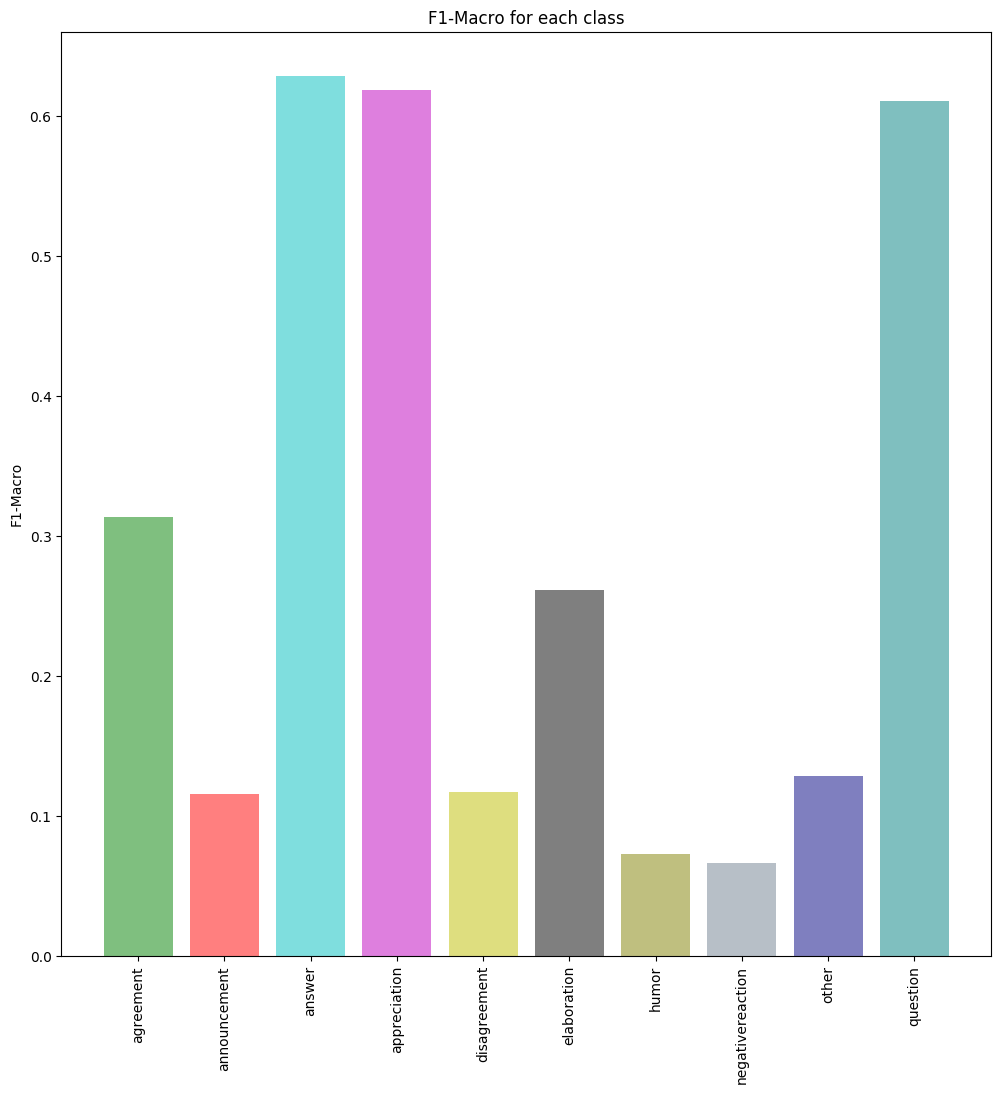

Classifier 'Best_model_After_Grid_Search' has Acc=0.516 P=0.274 R=0.365 F1=0.294
                  precision    recall  f1-score   support

       agreement       0.24      0.44      0.31       528
    announcement       0.08      0.22      0.12       134
          answer       0.75      0.54      0.63     11004
    appreciation       0.58      0.66      0.62      1511
    disagreement       0.07      0.27      0.12       177
     elaboration       0.23      0.30      0.26      2843
           humor       0.05      0.15      0.07       145
negativereaction       0.04      0.22      0.07        55
           other       0.09      0.22      0.13       152
        question       0.60      0.63      0.61      3263

       micro avg       0.52      0.52      0.52     19812
       macro avg       0.27      0.36      0.29     19812
    weighted avg       0.60      0.52      0.55     19812


Confusion matrix:
 [[ 232    3  439   45   10  149    3    6    2   62]
 [   1   29  192   10    3   80

In [0]:
evaluation_summary("Best_model_After_Grid_Search", res_best_1, test_posts['discourse_type'])

Confusion matrix, without normalization


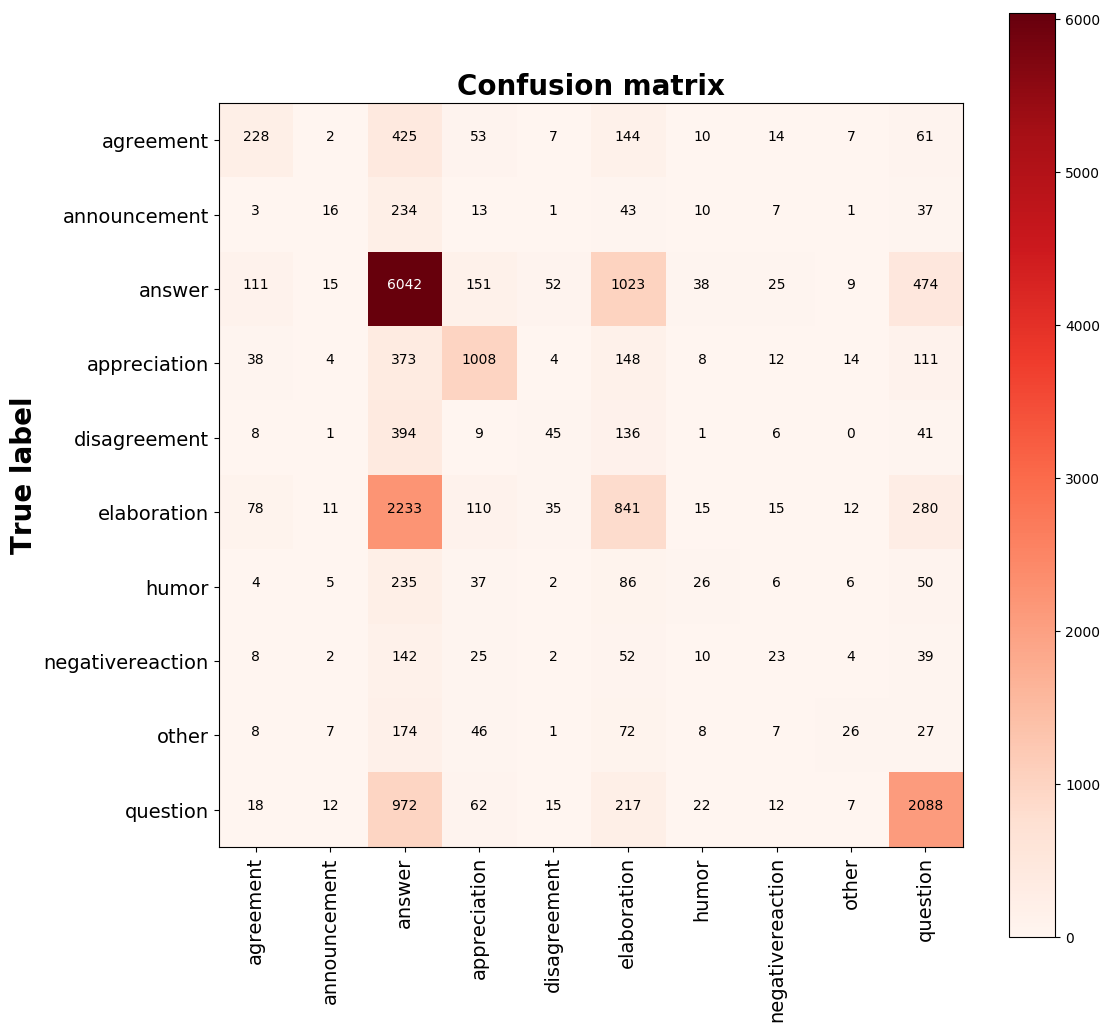

In [0]:
labels = unique_labels(test_posts['discourse_type'], res_best_1)
plot_confusion_matrix(confusion_matrix(test_posts['discourse_type'],res_best_1),labels)

In [0]:
res = test_posts.body[(test_threads.subreddit=='gaming')*(res_best_1 != 'gaming')]
# for l in res:
#   for p in l:
#     if 'body' in p:
#       print(p['body'])

## Error_Analysis

In [0]:
print(res_best_1)
print(test_posts.body[(test_posts.discourse_type=='question')])

['appreciation' 'answer' 'question' ... 'appreciation' 'appreciation'
 'appreciation']
0        Edit: I'm in the Oklahoma City and Tulsa Oklah...
1        are you in the USA?  i would say that unless t...
13       I have 20mb upload speed but when I try to str...
14       What program are you using to broadcast? Try a...
17                                                        
27       So yeah. I was going to go with Project Fi. Th...
30                            Which plan are you guys on? 
32                What's the reason it's not compatible?!?
37       How do you know they have the phone details? I...
45       Why would you have a termination fee for Veriz...
54                                                        
63       Girlfriend is a vegetarian, which pretty much ...
70       Wait, did you have to jerk off your buddy so y...
73       Anyone have either of these carriers?  Thinkin...
101      Attractive? What games have you been watching?...
102      As tittle. I'm tryi

In [0]:
res = test_posts[(test_posts.discourse_type=='announcement')*(res_best_1 != 'announcement')]
res['my_clasiffier_prediction'] = predictions[(test_posts.discourse_type=='announcement')*(res_best_1 != 'announcement')]

for body,my_class in zip(res.body, res.my_clasiffier_prediction):
  
  print('!'*200)
  print(my_class,body, sep='\n'+'*'*200+'\n')

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
answer
********************************************************************************************************************************************************************************************************
Don't believe me? Check it out:

Jack Trammell's ActBlue status is [here](https://secure.actblue.com/entity/fundraisers/37552).

David Brat had [$83,870 as of May 21st](https://www.opensecrets.org/races/summary.php?id=VA07&cycle=2014). He likely had less by election day and, because VA-07 is seen to be a shoo-in for Republicans, he probably hasn't fundraised since.

No commentary. Just thought people here might be curious to know.

Edit: I just realized linking to ActBlue directed people toward a donation page. In the spirit of fairness, you can contribute to [David Brat on his websit

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##EXTRA FEATURES

##Subreddit

## Word_Embending

In [0]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class AverageEmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
        self.dimension = 300
        
    def fit(self, X, y):
        return self
      
    def transform(self, X):  
      # Skip OOV terms. 
      # Return 0 for all dimensions if no words are in the vocabulary.
      dense_matrix =  np.array([ 
          np.mean([token.vector for token in self.tokenizer(doc) if not token.is_oov]
                or [np.zeros(self.dimension)], axis=0)
          for doc in X
      ])
      return dense_matrix
    


In [0]:
embedding_vectorizer = AverageEmbeddingTransformer(spacy_tokenize)
train_posts_embedding_features = embedding_vectorizer.transform(train_posts['body'])
test_posts_embedding_features = embedding_vectorizer.transform(test_posts['body'])

In [0]:
from scipy.sparse import csr_matrix
train_posts_sparse_embeddings = csr_matrix(train_posts_embedding_features)
test_posts_sparse_embeddings = csr_matrix(test_posts_embedding_features)
type(test_posts_sparse_embeddings)

scipy.sparse.csr.csr_matrix

In [0]:
train_posts['train_sparse_embeddings'] = train_posts_sparse_embeddings
test_posts['test_sparse_embeddings'] = test_posts_sparse_embeddings

##Subreddit +Author

In [0]:
# ['subreddit', 'title', 'url', 'id', 'author', 'body', 'majority_link', 'post_depth', 'discourse_type', 'in_reply_to']
subreddit_author = []
for subreddit_, author_ in zip(train_posts.subreddit, train_posts.author):
  element = subreddit_+ " " +  author_
  subreddit_author.append(element)

train_posts['subreddit_author'] = subreddit_author


In [0]:
subreddit_author = []
for subreddit_, author_ in zip(test_posts.subreddit, test_posts.author):
  element = subreddit_+ " " +  author_
  subreddit_author.append(element)

test_posts['subreddit_author'] = subreddit_author


##Body length

In [0]:
body_len_train = []
for body_ in train_posts.body:
  body_len_train.append(len(body_))
  
train_posts['body_len'] = body_len_train
print(train_posts['body_len'].shape)

(79267,)


In [0]:
body_len_test = []
for body_ in test_posts.body:
  body_len_test.append(len(body_))
  
test_posts['body_len'] = body_len_test
print(test_posts['body_len'].shape)
print(body_len_test[:10])

(19812,)
[92, 437, 9, 666, 123, 318, 140, 688, 187, 127]


##Comment depth

In [0]:
#train_posts['post_depth']
#test_posts['post_depth']

## Emoticon Tokenizer

In [0]:
from nltk.tokenize.casual import TweetTokenizer

def spacy_tokenize_(string):
  tokens = list()
  doc = TweetTokenizer().tokenize(string)
  for token in doc:
    tokens.append(token)
  return tokens

#@Normalize
def normalize_(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.lower().strip()
    normalized_tokens.append(normalized)
  return normalized_tokens
  

#@Tokenize and normalize
def tokenize_normalize_emoticons(string):
  return normalize_(spacy_tokenize_(string))

In [0]:


s = u"Here is a smiling face: 😀!"

s1 = tokenize_normalize_emoticons(s)
print (s1)
s2 = tokenize_normalize(s)
print(s2)





['here', 'is', 'a', 'smiling', 'face', ':', '😀', '!']
['here', 'is', 'a', 'smiling', 'face']


##Preparing the features

In [0]:
def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average = 'macro')
  recall = recall_score(predictions, true_labels, average = 'macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels,1,average='macro') #1 means f_1 measure
  labels = unique_labels(test_posts['discourse_type'], predictions)
  f1_ = fbeta_score(predictions, true_labels,1,average=None)
  y_pos = np.arange(len(labels))
  plt.figure(figsize=(12,12))
  performance = f1_
  plt.bar(y_pos, performance, align='center', alpha=0.5, color= ['g','r','c','m', 'y', 'k','olive','slategray','navy','teal'])

  plt.xticks(y_pos, labels,rotation=90)
  plt.ylabel('F1-Macro')
  plt.xlabel='subredits'
  plt.title('F1-Macro for each class')
  plt.show()
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels))
  
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


In [0]:
#BODY

Tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize_emoticons, ngram_range=(1,2),sublinear_tf=False, max_features=5000)
train_tfidf_comment_body_emoticons = Tf_idf_vectorizer.fit_transform(train_posts['body'])
test_tfidf_comment_body_emoticons = Tf_idf_vectorizer.transform(test_posts['body'])




In [0]:
#SUBREDDIT

Tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,2) ,sublinear_tf=True, max_features=5000)                                                          
train_tfidf_comment_subreddit = Tf_idf_vectorizer.fit_transform(train_posts['subreddit'])
test_tfidf_comment_subreddit = Tf_idf_vectorizer.transform(test_posts['subreddit'])

In [0]:
#AUTHOR

Tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,1) ,sublinear_tf=True, max_features=5000)                                                           
train_tfidf_comment_author = Tf_idf_vectorizer.fit_transform(train_posts['author'])
test_tfidf_comment_author = Tf_idf_vectorizer.transform(test_posts['author'])

In [0]:
#Subreddit+ Author

Tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,1) ,sublinear_tf=True, max_features=5000)                                                           
train_tfidf_comment_subreddit_author = Tf_idf_vectorizer.fit_transform(train_posts['subreddit_author'])
test_tfidf_comment_subreddit_author = Tf_idf_vectorizer.transform(test_posts['subreddit_author'])

In [0]:
#body_len

train_tfidf_comment_body_len = train_posts['body_len'][:,np.newaxis]
test_tfidf_comment_body_len = test_posts['body_len'][:,np.newaxis]


In [0]:
#comment_depth

train_tfidf_comment_depth = train_posts['post_depth'][:,np.newaxis]
test_tfidf_comment_depth = test_posts['post_depth'][:,np.newaxis]

# Prediction

## Word Embending

In [0]:
X_train = sparse.hstack([train_tfidf_comment_body, train_tfidf_comment_title, train_tfidf_comment_author, train_posts_sparse_embeddings])
X_test = sparse.hstack([test_tfidf_comment_body, test_tfidf_comment_title, test_tfidf_comment_author, test_posts_sparse_embeddings])                

In [0]:
best_log_clf_extra_1 = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_extra = best_log_clf_extra_1.predict(X_test)

Evaluation for: Tuned_Logistic_Extra_Word_Embending


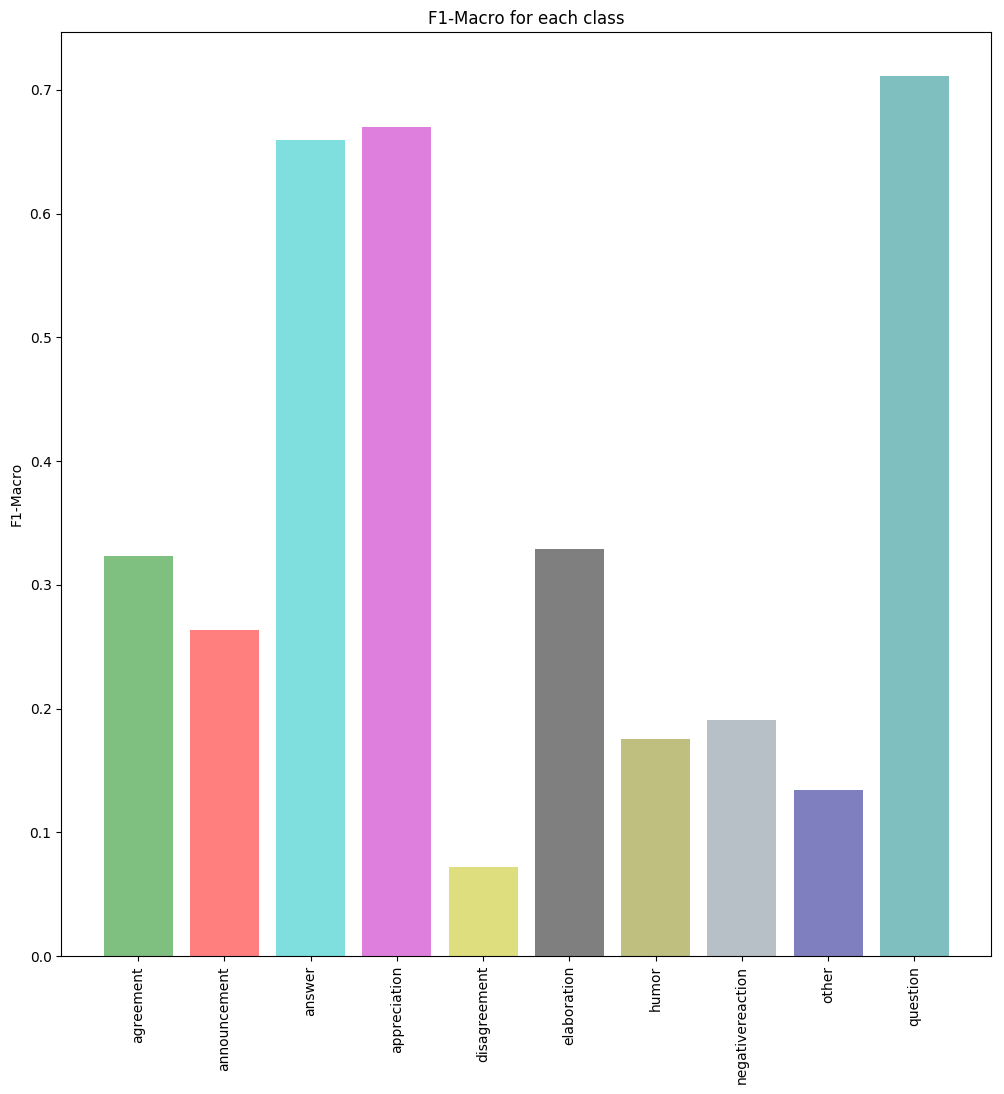

Classifier 'Tuned_Logistic_Extra_Word_Embending' has Acc=0.567 P=0.324 R=0.442 F1=0.353
                  precision    recall  f1-score   support

       agreement       0.24      0.51      0.32       436
    announcement       0.20      0.40      0.26       181
          answer       0.78      0.57      0.66     10770
    appreciation       0.63      0.72      0.67      1499
    disagreement       0.04      0.21      0.07       136
     elaboration       0.30      0.37      0.33      2883
           humor       0.12      0.31      0.18       180
negativereaction       0.13      0.33      0.19       123
           other       0.09      0.29      0.13       114
        question       0.72      0.70      0.71      3490

       micro avg       0.57      0.57      0.57     19812
       macro avg       0.32      0.44      0.35     19812
    weighted avg       0.65      0.57      0.60     19812


Confusion matrix:
 [[ 224    5  409   59   11  186    6   10    1   40]
 [   1   72  132   13   

In [0]:
evaluation_summary('Tuned_Logistic_Extra_Word_Embending', res_best_extra,test_posts['discourse_type'])

##Subredit

In [0]:
X_train = sparse.hstack([train_tfidf_comment_body,train_tfidf_comment_title , train_tfidf_comment_author,train_tfidf_comment_subreddit])
X_test = sparse.hstack([test_tfidf_comment_body, test_tfidf_comment_title, test_tfidf_comment_author, test_tfidf_comment_subreddit])          

In [0]:
best_log_clf_extra_1 = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_extra = best_log_clf_extra_1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Evaluation for: Tuned_Logistic_Extra_Subreddit


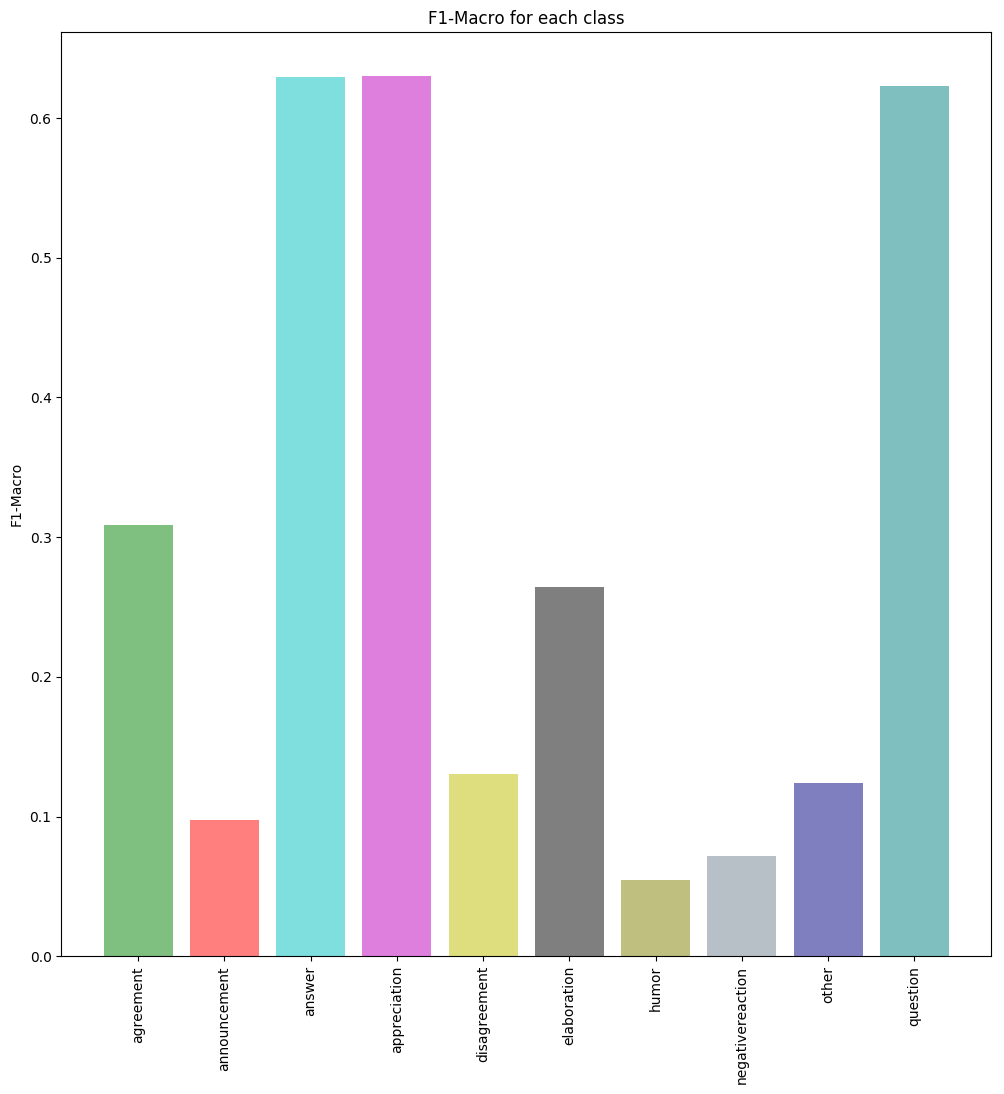

Classifier 'Tuned_Logistic_Extra_Subreddit' has Acc=0.517 P=0.275 R=0.352 F1=0.293
                  precision    recall  f1-score   support

       agreement       0.25      0.42      0.31       557
    announcement       0.07      0.17      0.10       148
          answer       0.74      0.55      0.63     10640
    appreciation       0.59      0.68      0.63      1503
    disagreement       0.08      0.29      0.13       185
     elaboration       0.24      0.29      0.26      3007
           humor       0.04      0.12      0.05       129
negativereaction       0.05      0.17      0.07        83
           other       0.09      0.21      0.12       156
        question       0.62      0.62      0.62      3404

       micro avg       0.52      0.52      0.52     19812
       macro avg       0.28      0.35      0.29     19812
    weighted avg       0.59      0.52      0.55     19812


Confusion matrix:
 [[ 233    3  400   44    7  177    6    8    7   66]
 [   3   25  184   15    1   

In [0]:
evaluation_summary('Tuned_Logistic_Extra_Subreddit', res_best_extra,test_posts['discourse_type'])

##Subreddit+Author

In [0]:
X_train = sparse.hstack([train_tfidf_comment_body, train_tfidf_comment_title, train_tfidf_comment_author, train_tfidf_comment_subreddit_author])
X_test = sparse.hstack([test_tfidf_comment_body, test_tfidf_comment_title, test_tfidf_comment_author, test_tfidf_comment_subreddit_author])          

In [0]:
best_log_clf_extra_1 = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_extra = best_log_clf_extra_1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Evaluation for: Tuned_Logistic_Subreddit_author


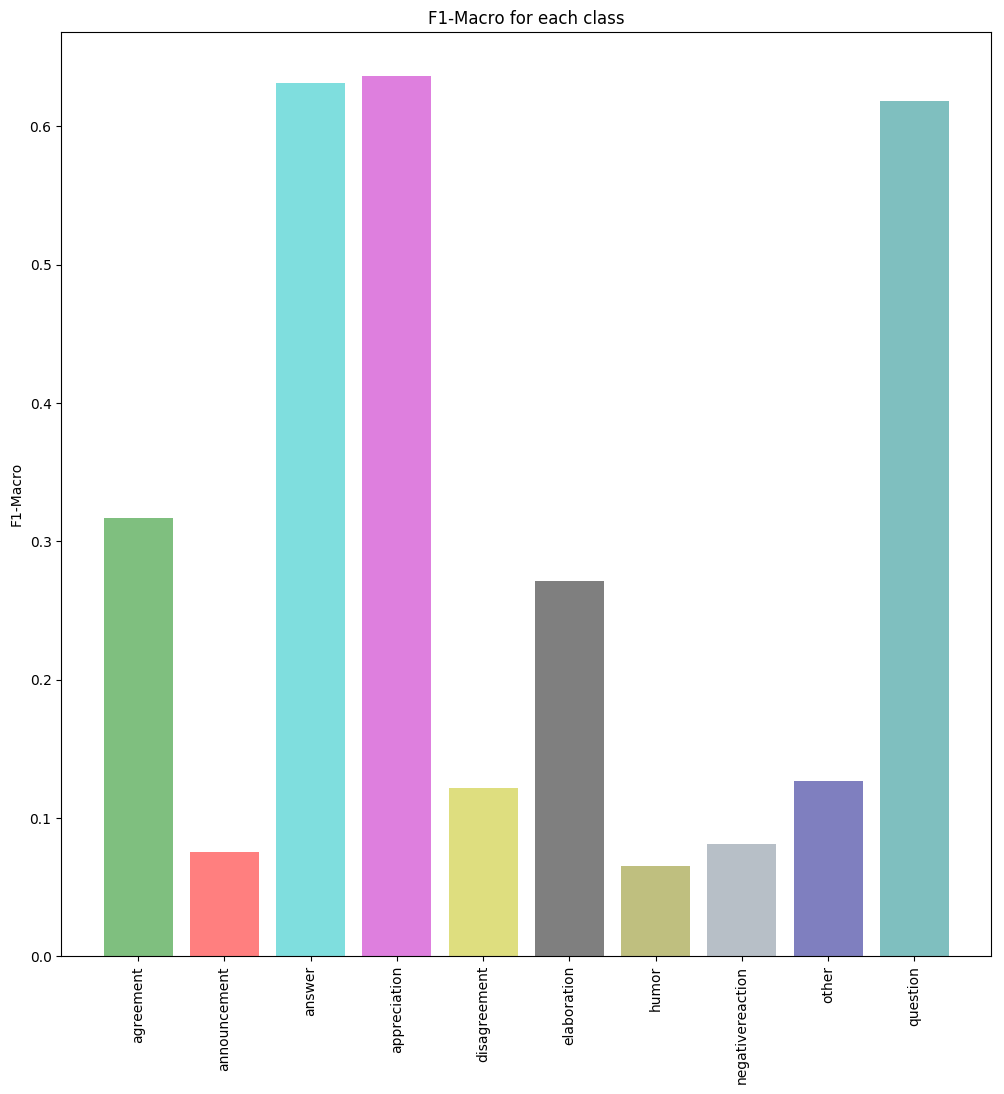

Classifier 'Tuned_Logistic_Subreddit_author' has Acc=0.518 P=0.275 R=0.359 F1=0.294
                  precision    recall  f1-score   support

       agreement       0.25      0.43      0.32       557
    announcement       0.05      0.16      0.08       112
          answer       0.74      0.55      0.63     10679
    appreciation       0.59      0.69      0.64      1452
    disagreement       0.08      0.26      0.12       195
     elaboration       0.25      0.29      0.27      3120
           humor       0.04      0.15      0.07       125
negativereaction       0.05      0.18      0.08        88
           other       0.09      0.25      0.13       130
        question       0.61      0.63      0.62      3354

       micro avg       0.52      0.52      0.52     19812
       macro avg       0.27      0.36      0.29     19812
    weighted avg       0.59      0.52      0.55     19812


Confusion matrix:
 [[ 239    2  396   41    8  187    6    5    6   61]
 [   3   18  183   15    3  

In [0]:
evaluation_summary('Tuned_Logistic_Subreddit_author', res_best_extra,test_posts['discourse_type'])

##Body_Len

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_posts['body_len'][:,np.newaxis])
train_posts['body_len_minmax'] = scaler.transform(train_posts['body_len'][:,np.newaxis])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
scaler = MinMaxScaler()
scaler.fit(test_posts['body_len'][:,np.newaxis])
test_posts['body_len_minmax'] = scaler.transform(test_posts['body_len'][:,np.newaxis])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
X_train = sparse.hstack([train_tfidf_comment_body, train_tfidf_comment_title, train_tfidf_comment_author, train_posts['body_len_minmax'][:,np.newaxis]])
X_test = sparse.hstack([test_tfidf_comment_body, test_tfidf_comment_title, test_tfidf_comment_author,test_posts['body_len_minmax'][:,np.newaxis]])           

In [0]:
best_log_clf_extra_1 = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_extra = best_log_clf_extra_1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Evaluation for: Tuned_Logistic_Body_len


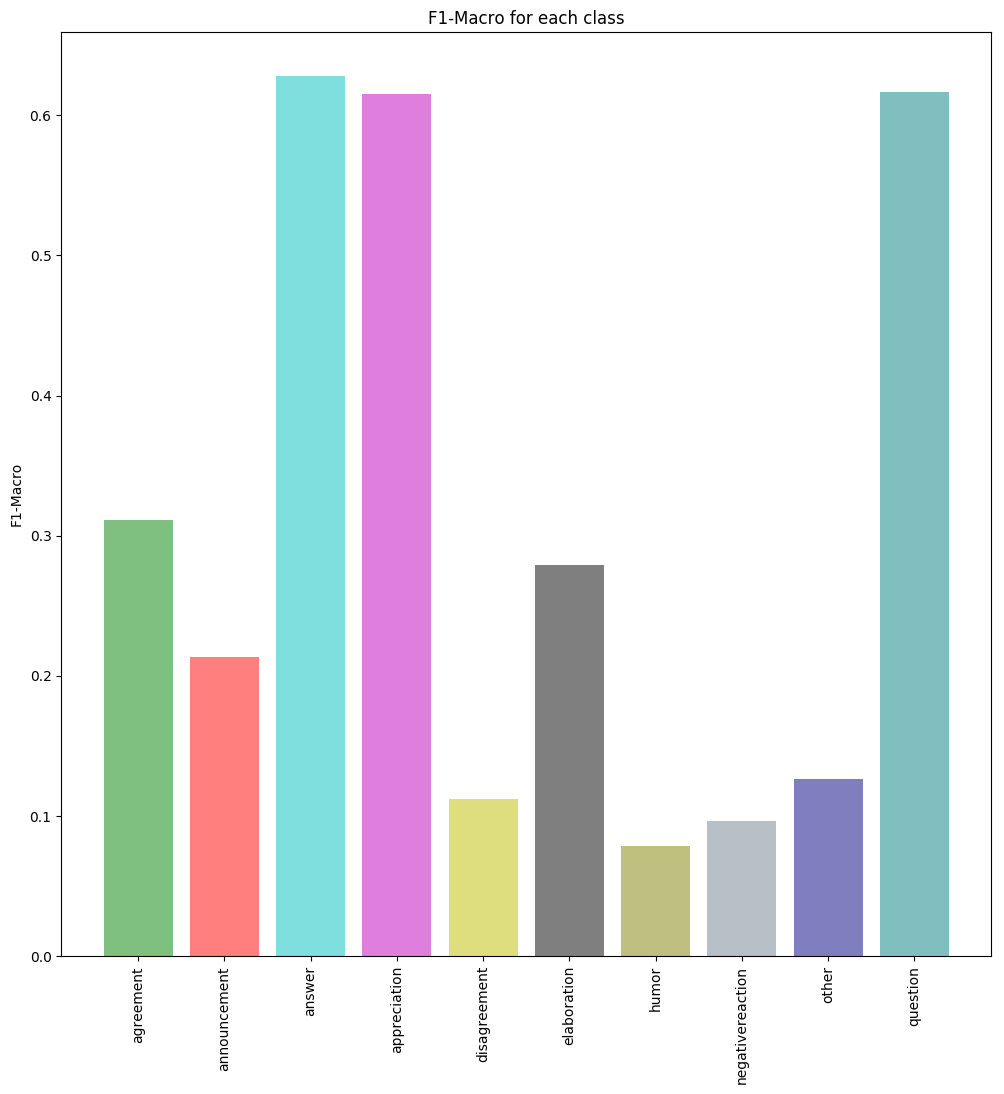

Classifier 'Tuned_Logistic_Body_len' has Acc=0.518 P=0.288 R=0.368 F1=0.308
                  precision    recall  f1-score   support

       agreement       0.24      0.43      0.31       540
    announcement       0.16      0.30      0.21       197
          answer       0.73      0.55      0.63     10443
    appreciation       0.58      0.66      0.62      1521
    disagreement       0.07      0.28      0.11       161
     elaboration       0.25      0.31      0.28      2926
           humor       0.05      0.16      0.08       151
negativereaction       0.07      0.19      0.10       108
           other       0.09      0.20      0.13       178
        question       0.63      0.60      0.62      3587

       micro avg       0.52      0.52      0.52     19812
       macro avg       0.29      0.37      0.31     19812
    weighted avg       0.59      0.52      0.54     19812


Confusion matrix:
 [[ 232    0  413   49   10  158    5    9    2   73]
 [   1   60  160   11    1   59    6

In [0]:
evaluation_summary('Tuned_Logistic_Body_len', res_best_extra,test_posts['discourse_type'])

##Depth_Post

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_posts['post_depth'][:,np.newaxis])
train_posts['depth_post_minmax'] = scaler.transform(train_posts['post_depth'][:,np.newaxis])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
scaler = MinMaxScaler()
scaler.fit(test_posts['post_depth'][:,np.newaxis])
test_posts['depth_post_minmax'] = scaler.transform(test_posts['post_depth'][:,np.newaxis])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
X_train = sparse.hstack([train_tfidf_comment_body, train_tfidf_comment_title, train_tfidf_comment_author, train_posts['depth_post_minmax'][:,np.newaxis]])
X_test = sparse.hstack([test_tfidf_comment_body, test_tfidf_comment_title, test_tfidf_comment_author, test_posts['depth_post_minmax'][:,np.newaxis]])          

In [0]:
best_log_clf_extra_1 = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_extra = best_log_clf_extra_1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Evaluation for: Tuned_Logistic_Body_len


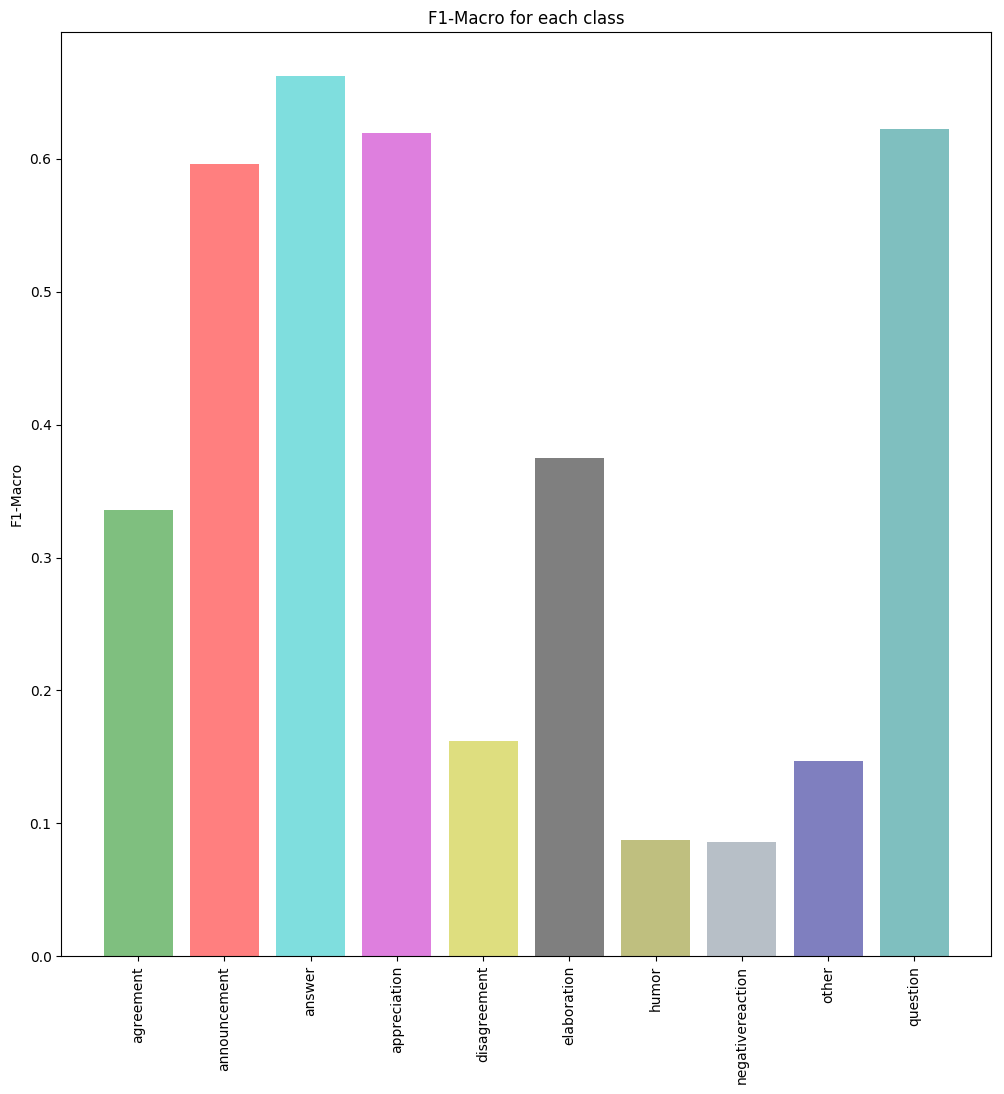

Classifier 'Tuned_Logistic_Body_len' has Acc=0.553 P=0.343 R=0.430 F1=0.369
                  precision    recall  f1-score   support

       agreement       0.27      0.45      0.34       574
    announcement       0.53      0.68      0.60       286
          answer       0.75      0.59      0.66     10102
    appreciation       0.56      0.69      0.62      1398
    disagreement       0.11      0.28      0.16       260
     elaboration       0.37      0.38      0.38      3556
           humor       0.06      0.19      0.09       138
negativereaction       0.06      0.20      0.09        87
           other       0.11      0.21      0.15       208
        question       0.60      0.64      0.62      3203

       micro avg       0.55      0.55      0.55     19812
       macro avg       0.34      0.43      0.37     19812
    weighted avg       0.61      0.55      0.57     19812


Confusion matrix:
 [[ 256    0  348   43   19  218    5   10    3   49]
 [   0  194  118    1    1    6    0

In [0]:
evaluation_summary('Tuned_Logistic_Body_len', res_best_extra,test_posts['discourse_type'])

##Emoticon Tokenizer

In [0]:
X_train = sparse.hstack([train_tfidf_comment_body_emoticons, train_tfidf_comment_title, train_tfidf_comment_author])
X_test = sparse.hstack([test_tfidf_comment_body_emoticons, test_tfidf_comment_title, test_tfidf_comment_author, ])                

In [0]:
best_log_clf_extra_1 = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_extra = best_log_clf_extra_1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Evaluation for: Tuned_Logistic_Body_len


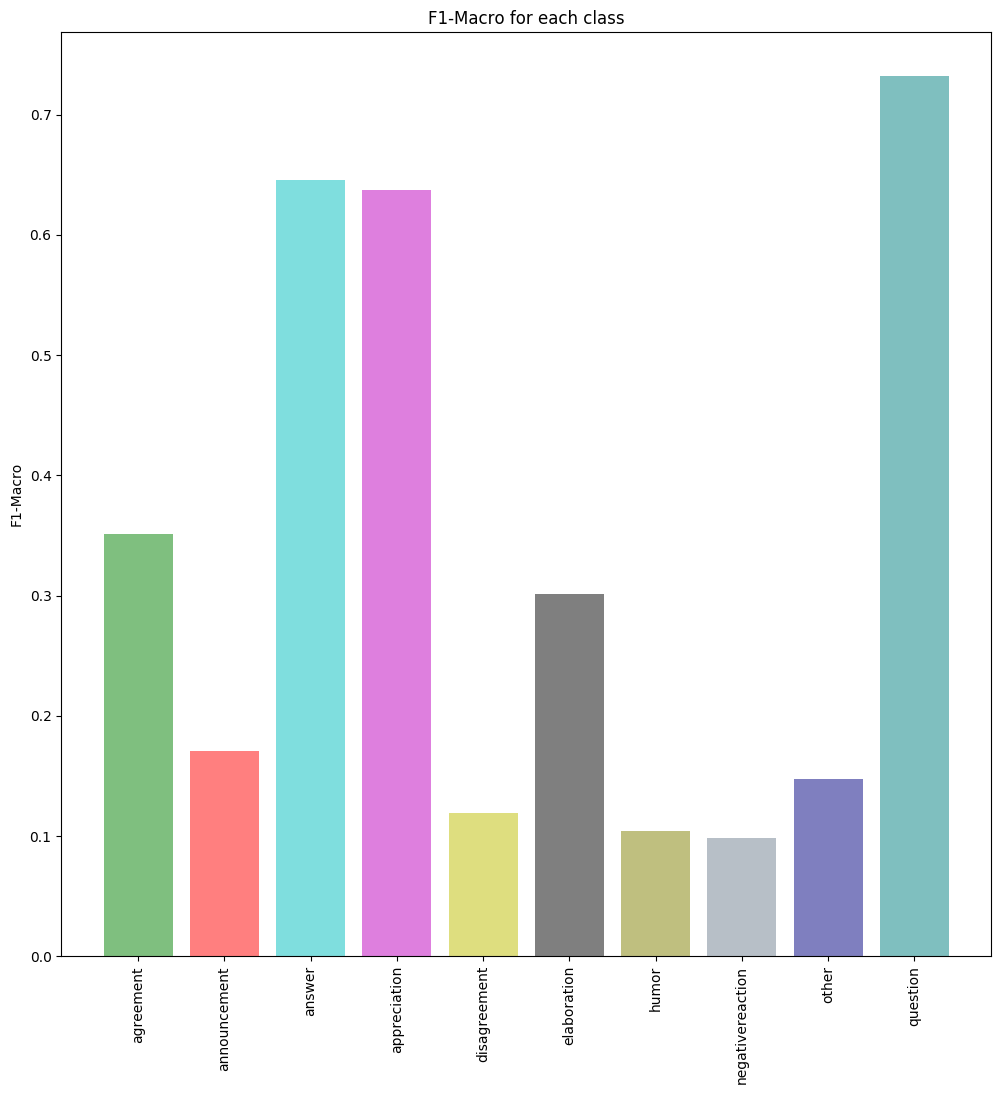

Classifier 'Tuned_Logistic_Body_len' has Acc=0.552 P=0.308 R=0.400 F1=0.331
                  precision    recall  f1-score   support

       agreement       0.28      0.47      0.35       558
    announcement       0.13      0.24      0.17       208
          answer       0.75      0.56      0.65     10608
    appreciation       0.61      0.67      0.64      1545
    disagreement       0.08      0.24      0.12       214
     elaboration       0.28      0.33      0.30      3014
           humor       0.07      0.25      0.10       118
negativereaction       0.06      0.24      0.10        79
           other       0.11      0.24      0.15       168
        question       0.72      0.75      0.73      3300

       micro avg       0.55      0.55      0.55     19812
       macro avg       0.31      0.40      0.33     19812
    weighted avg       0.62      0.55      0.58     19812


Confusion matrix:
 [[ 265    5  410   52   10  163    4    9    6   27]
 [   1   49  185    9    3   81    2

In [0]:
evaluation_summary('Tuned_Logistic_Body_len', res_best_extra,test_posts['discourse_type'])

##Discussion Length

In [0]:
body_len_per_title = []
for t in train_posts['title']:
  count = 0
  for t_1 in train_posts['title']:
    if(t==t_1):
      count = count + 1
  body_len_per_title.append(count)



In [0]:
train_posts['discuss_len'] = body_len_per_title
scaler = MinMaxScaler()
scaler.fit(train_posts['discuss_len'][:,np.newaxis])
train_posts['discuss_len_minmax'] = scaler.transform(train_posts['discuss_len'][:,np.newaxis])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
body_len_per_title_test = []
for t in test_posts['title']:
  count = 0
  for t_1 in test_posts['title']:
    if(t==t_1):
      count = count + 1
  body_len_per_title_test.append(count)



In [0]:
test_posts['discuss_len'] = body_len_per_title_test
scaler = MinMaxScaler()
scaler.fit(test_posts['discuss_len'][:,np.newaxis])
test_posts['discuss_len_minmax'] = scaler.transform(test_posts['discuss_len'][:,np.newaxis])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
X_train = sparse.hstack([train_tfidf_comment_body, train_tfidf_comment_title, train_tfidf_comment_author, train_posts['discuss_len_minmax'][:,np.newaxis]])
X_test = sparse.hstack([test_tfidf_comment_body, test_tfidf_comment_title, test_tfidf_comment_author,test_posts['discuss_len_minmax'][:,np.newaxis]])           

In [0]:
best_log_clf_extra = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_extra = best_log_clf_extra.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Evaluation for: Tuned_Logistic_Extra


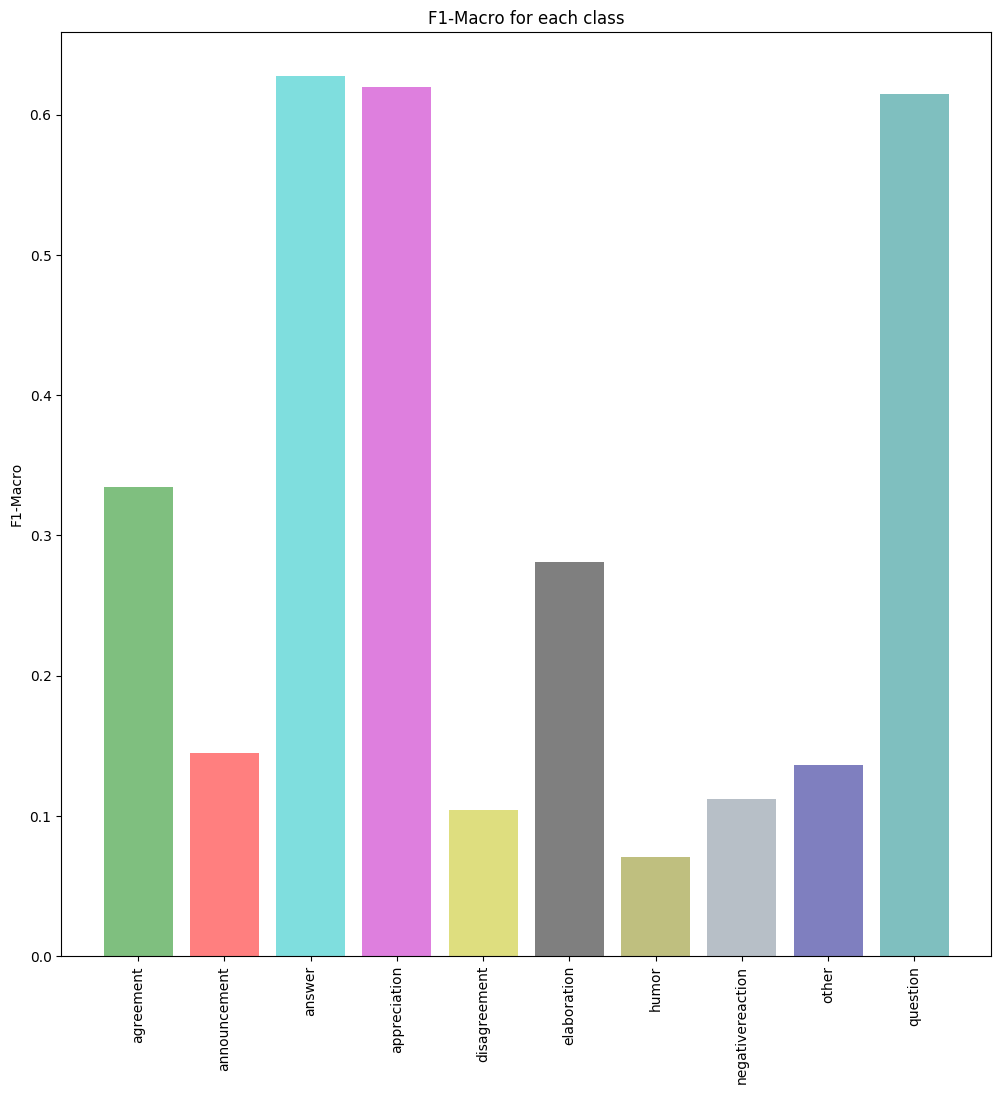

Classifier 'Tuned_Logistic_Extra' has Acc=0.517 P=0.281 R=0.378 F1=0.305
                  precision    recall  f1-score   support

       agreement       0.26      0.47      0.33       526
    announcement       0.10      0.30      0.15       117
          answer       0.73      0.55      0.63     10562
    appreciation       0.57      0.67      0.62      1470
    disagreement       0.07      0.25      0.10       165
     elaboration       0.27      0.30      0.28      3305
           humor       0.04      0.18      0.07       110
negativereaction       0.08      0.20      0.11       121
           other       0.10      0.24      0.14       153
        question       0.60      0.63      0.61      3283

       micro avg       0.52      0.52      0.52     19812
       macro avg       0.28      0.38      0.30     19812
    weighted avg       0.59      0.52      0.54     19812


Confusion matrix:
 [[ 247    2  401   42   10  183    2   10    2   52]
 [   1   35  182   12    4   73    4   

In [0]:
evaluation_summary('Tuned_Logistic_Extra', res_best_extra,test_posts['discourse_type'])

#STACK ALL THE FEATURES

In [0]:
from scipy import sparse
X_train = sparse.hstack([train_tfidf_comment_body_emoticons,train_tfidf_comment_title,  train_tfidf_comment_author, train_posts_sparse_embeddings,train_tfidf_comment_subreddit , train_tfidf_comment_subreddit_author, train_posts['body_len_minmax'][:,np.newaxis], train_posts['depth_post_minmax'][:,np.newaxis], train_posts['discuss_len_minmax'][:,np.newaxis]   ])
X_test = sparse.hstack([test_tfidf_comment_body_emoticons, test_tfidf_comment_title, test_tfidf_comment_author, test_posts_sparse_embeddings, test_tfidf_comment_subreddit , test_tfidf_comment_subreddit_author, test_posts['body_len_minmax'][:,np.newaxis], test_posts['depth_post_minmax'][:,np.newaxis], test_posts['discuss_len_minmax'][:,np.newaxis]  ])



##Evaluation

In [0]:
best_log_clf_extra = LogisticRegression(solver = 'lbfgs', C=10, multi_class='multinomial').fit(X_train, train_posts['discourse_type'])
res_best_extra = best_log_clf_extra.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Evaluation for: Tuned_Logistic_Extra


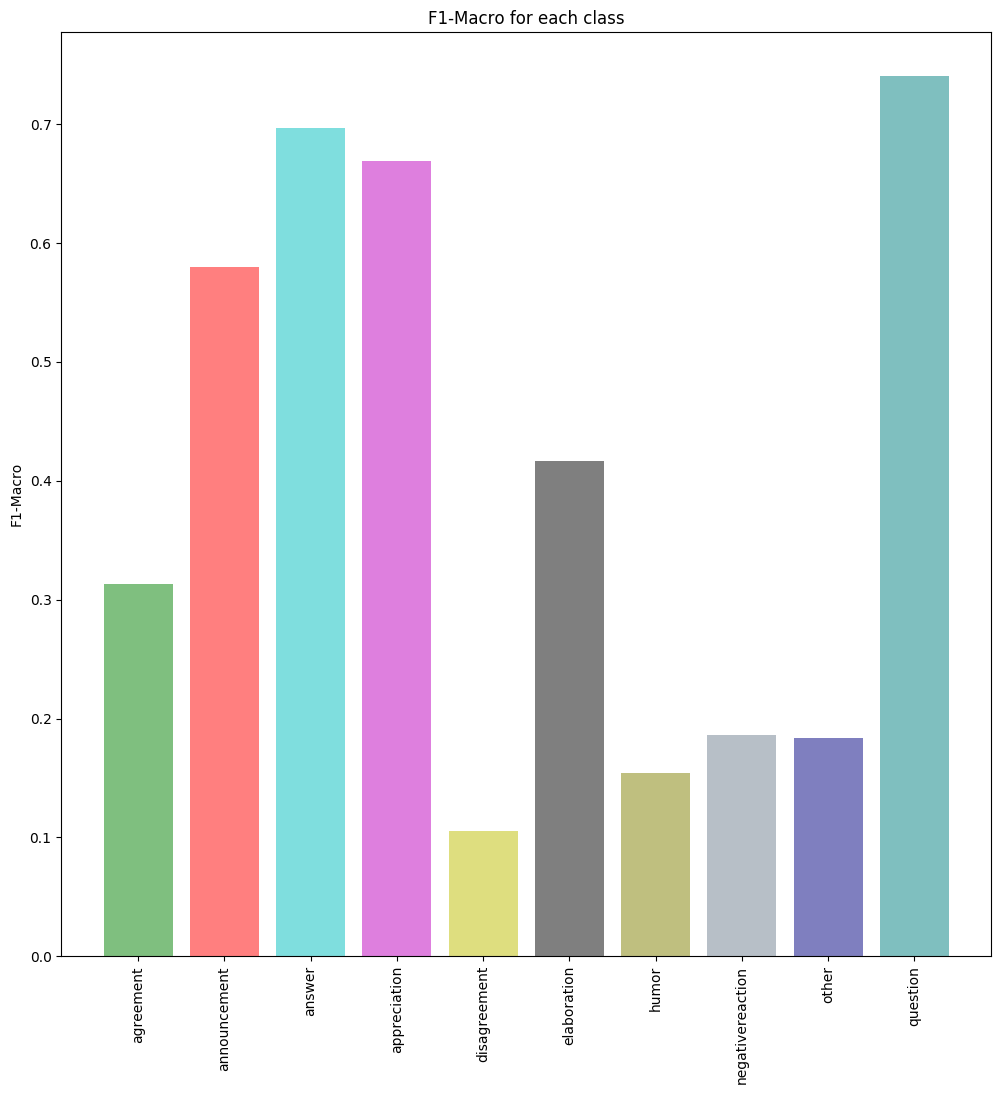

Classifier 'Tuned_Logistic_Extra' has Acc=0.602 P=0.379 R=0.478 F1=0.404
                  precision    recall  f1-score   support

       agreement       0.23      0.47      0.31       468
    announcement       0.56      0.60      0.58       342
          answer       0.78      0.63      0.70      9926
    appreciation       0.64      0.70      0.67      1567
    disagreement       0.07      0.23      0.11       194
     elaboration       0.41      0.42      0.42      3539
           humor       0.10      0.33      0.15       141
negativereaction       0.13      0.33      0.19       122
           other       0.13      0.33      0.18       146
        question       0.73      0.75      0.74      3367

       micro avg       0.60      0.60      0.60     19812
       macro avg       0.38      0.48      0.40     19812
    weighted avg       0.66      0.60      0.62     19812


Confusion matrix:
 [[ 222    0  317   76   14  273    5   10    4   30]
 [   3  205   99    7    1   10    1   

In [0]:
evaluation_summary('Tuned_Logistic_Extra', res_best_extra,test_posts['discourse_type'])

#Feature Importance

In [0]:
#!pip install eli5

    100% |████████████████████████████████| 102kB 2.2MB/s 


In [0]:
import eli5
eli5.show_weights(best_log_clf_extra,top=20)


<Figure size 1000x1000 with 0 Axes>